# Models for J1257 QPO
Notebook to study characteristic frequencies of different QPO models applied to the supermassive black hole 2MASXJ12571076+2724177

Known parameters:
* $M = 10^{6.3} M_\odot$
* $\nu = 3.3 * 10^{-5}$ HZ
* $d = 90$ Mpc

let's look for a range of frequencies and masses around these parameters

### General settings

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from setup import *

## RELATIVISTIC PRECESSION MODEL

in this model the QPO frequency is generally identified with the Lense-Thirring precesion around a spinning compact object.
alternatively, also the periastreon precession frequency or the rotation frequency can be associated with it.

in any case, the frequencies will only depend on three parameters: the mass of the objecy, its spin, and distance from the central object

> OSS: the Kerr frequencies are inddependent on the sign of the spin, so prograde and retrograde spins give the same resulkts! 

> However, they are not equivalent because the values of the ISCO are different in the two cases, so frequencies matching for prograde spin at a certain radius will not match also for retrograde spin if this radius is lower than the ISCO (ISCO increases with decreasing spin)

In [76]:
#function to find the matching combinations

def find_match(a_range, r_ranges, model, Ms=M_bh):
    matches = []
    if Ms is list or isinstance(Ms, np.ndarray):
        for M in Ms:
            for i, a in enumerate(a_range):
                for r in r_ranges[i]:
                    freq = model(r, a, M)
                    if abs(freq - nu0) < tol:
                        matches.append((M, a, r, freq))
    else:
        for i, a in enumerate(a_range):
            for r in r_ranges[i]:
                freq = model(r, a)
                if abs(freq - nu0) < tol:
                    matches.append((M_bh, a, r, freq))
    return matches

def stampa(matches):
    print(f"Found {len(matches)} matches:")
    for m in matches:
        print(f"a={m[1]}, r={m[2]} R_g → ν={m[3]} Hz")

In [77]:
#functions for plots

def select(a_match, n_pick=10):
    a_match = np.array(a_match)
    # Sample a few spin values for clarity
    idx = np.linspace(0, len(a_match)-1, n_pick).astype(int)
    a_sampled = a_match[idx]
    return a_sampled

def plot_nu_vs_r(a_sampled, M, nu0, target_min, target_max, label, title, model):
    plt.figure(figsize=(9,6))

    for a in a_sampled:
        r_grid = np.linspace(r_isco(a), 1e4, 800)
        freq = np.array([model(r, a, M) for r in r_grid])
        plt.plot(r_grid, freq, label=f"a = {a:.5f}")
        
    # Target frequency band
    plt.fill_between(r_grid, target_min, target_max, color='gray', alpha=0.2,
                    label="Target range")
    plt.plot(r_grid, np.ones_like(r_grid)*nu0, label="Target frequency")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("r  [GM/c²]")
    plt.ylabel(label)
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [78]:
# set parameters range
a_range = np.linspace(-95, 95, 191)  # Spins
a_range = a_range/100
a_range = np.insert(a_range, 0, -0.998)
a_range = np.append(a_range, 0.998)      # add extreme prograde spin

r_ranges = [np.exp(np.linspace(np.log(r_isco(a)), np.log(1e4), 800)) for a in a_range]

#the linear span semms to produce different results...
#r_ranges = [np.arange(r_isco(a), 1e4, 800) for a in a_range]     # Radii in GM/c^2

#### Let's start by considering the fixed mass given above

##### first, LT precession

In [79]:
#let's look for all the matching combinations of parameters
LT_matches = find_match(a_range, r_ranges, nu_LT)
# Print results
stampa(LT_matches)

Found 130 matches:
a=-0.86, r=16.395900647941374 R_g → ν=3.33215098780031e-05 Hz
a=-0.85, r=16.346467509384194 R_g → ν=3.3298636038720355e-05 Hz
a=-0.84, r=16.296966224584782 R_g → ν=3.327254137957549e-05 Hz
a=-0.83, r=16.247396253040744 R_g → ν=3.324313673696861e-05 Hz
a=-0.82, r=16.197757046899863 R_g → ν=3.321033045126953e-05 Hz
a=-0.81, r=16.148048050818513 R_g → ν=3.317402828837963e-05 Hz
a=-0.8, r=16.09826870181674 R_g → ν=3.313413335848548e-05 Hz
a=-0.79, r=16.048418429129594 R_g → ν=3.309054603188957e-05 Hz
a=-0.78, r=15.99849665405472 R_g → ν=3.304316385180253e-05 Hz
a=-0.77, r=15.948502789796123 R_g → ν=3.299188144396687e-05 Hz
a=-0.76, r=15.898436241303909 R_g → ν=3.293659042298601e-05 Hz
a=-0.75, r=15.848296405109982 R_g → ν=3.2877179295219246e-05 Hz
a=-0.74, r=15.798082669159372 R_g → ν=3.281353335810142e-05 Hz
a=-0.73, r=15.747794412637353 R_g → ν=3.274553459573794e-05 Hz
a=-0.72, r=15.697431005791916 R_g → ν=3.267306157061448e-05 Hz
a=-0.69, r=15.408029774390004 R_g → ν=

i see the frequncy can be accounted for considering almost wathever spin, with a radius betweeen 6 and 17 Rg

As observed above, the corresponding radii to opposite freeuncies are almost equal, because the frequency given is the same, however the different value of ISCO can make some combinations not acceptablem so they don't appear

In [80]:
M_match, a_match, r_match, freq_match = zip(*LT_matches) if LT_matches else ([], [], [])
print(min(a_match), max(a_match))
print(min(r_match), max(r_match))

-0.86 0.94
6.244590442144907 16.831586350957586


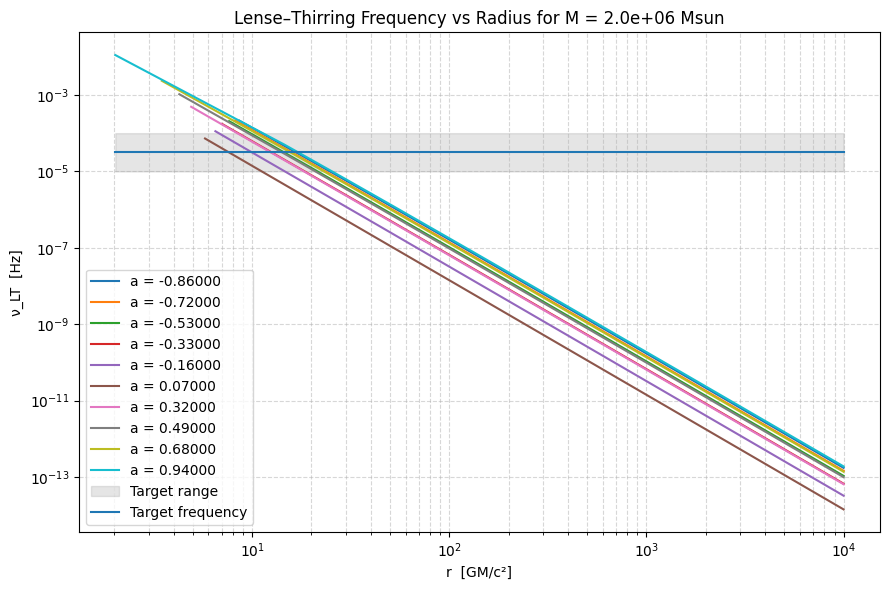

In [81]:
# -----------------------------
# PLOT 1: ν_LT(r) FOR DIFFERENT SPINS
# -----------------------------
a_selected = select(a_match, 10)
title = f"Lense–Thirring Frequency vs Radius for M = {M_bh:.1e} Msun"
label = "ν_LT  [Hz]"
plot_nu_vs_r(a_selected, M_bh, nu0, target_min, target_max, label, title, nu_LT)


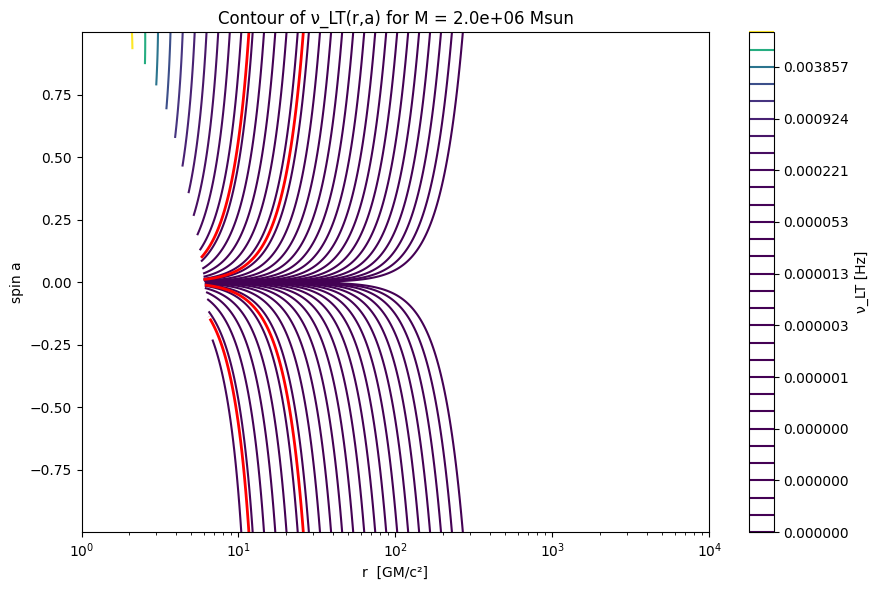

In [82]:
# -----------------------------
# PLOT 2: CONTOUR (r,a) → ν_LT
# -----------------------------
# Finer parameter grids
a_grid = np.linspace(-0.999, 0.999, 400)
r_grid2 = np.exp(np.linspace(np.log(1), np.log(1e4), 500))

A, R = np.meshgrid(a_grid, r_grid2)

# Compute ISCO for each spin
isco_vals = np.array([r_isco(a) for a in a_grid])   # 1D, length = len(a_grid)

# Prepare empty frequency grid
freq_grid = np.zeros((len(r_grid2), len(a_grid)))   # 2D array

# Fill manually (non-vectorized loops)
for j, a in enumerate(a_grid):
    r_isco_current = isco_vals[j]
    for i, r in enumerate(r_grid2):
        if r < r_isco_current:
            freq_grid[i, j] = np.nan   # mask later
        else:
            freq_grid[i, j] = nu_LT(r, a, M_bh)   # safe, scalar-by-scalar
freq_grid = np.ma.masked_invalid(freq_grid)

plt.figure(figsize=(9,6))
levels = np.logspace(-8, -2, 30)

cs = plt.contour(R, A, freq_grid, levels=levels, cmap="viridis")

# Highlight target band
plt.contour(R, A, freq_grid, levels=[target_min], colors='red', linewidths=2)
plt.contour(R, A, freq_grid, levels=[target_max], colors='red', linewidths=2)

plt.xscale("log")
plt.xlabel("r  [GM/c²]")
plt.ylabel("spin a")
plt.title(f"Contour of ν_LT(r,a) for M = {M_bh:.1e} Msun")
plt.colorbar(cs, label="ν_LT [Hz]")
plt.tight_layout()
plt.show()


##### second, periastron precession

In [83]:
#let's look for all the matching combinations of parameters
per_matches = find_match(a_range, r_ranges, nu_per)
stampa(per_matches)

Found 158 matches:
a=-0.998, r=35.68636611343269 R_g → ν=3.272542886165365e-05 Hz
a=-0.95, r=35.880005933853404 R_g → ν=3.2707024769277e-05 Hz
a=-0.94, r=35.78823882445615 R_g → ν=3.2994803474789797e-05 Hz
a=-0.93, r=35.69632054754273 R_g → ν=3.328615945096252e-05 Hz
a=-0.92, r=35.91927976816764 R_g → ν=3.287440939662425e-05 Hz
a=-0.91, r=35.82638493010077 R_g → ν=3.316606697406323e-05 Hz
a=-0.9, r=36.049798739470205 R_g → ν=3.2755591469371616e-05 Hz
a=-0.89, r=35.95591199059974 R_g → ν=3.304758660729477e-05 Hz
a=-0.87, r=36.084870289910086 R_g → ν=3.2930769380480574e-05 Hz
a=-0.86, r=35.98981182228471 R_g → ν=3.3226864310357195e-05 Hz
a=-0.85, r=36.21322740422639 R_g → ν=3.281566718467329e-05 Hz
a=-0.84, r=36.11714101244112 R_g → ν=3.311220667926454e-05 Hz
a=-0.83, r=36.34094988974361 R_g → ν=3.270233284476625e-05 Hz
a=-0.82, r=36.24381893020646 R_g → ν=3.2999357679565464e-05 Hz
a=-0.81, r=36.146514013345765 R_g → ν=3.3300238094651304e-05 Hz
a=-0.8, r=36.36981065495523 R_g → ν=3.28883

/tmp/ipykernel_3190/2634601670.py:15: RuntimeWarning: invalid value encountered in sqrt
  factor = np.sqrt(1 - (6)/r + (8*abs(a))/r**1.5 - (3*a**2)/r**2)


same as aboive but with a radius betweeen 35 and 40 Rg
interestingy, here R decreases with the spin absolute value, while before it increased.
moregvoer they are in a much closer range now

/tmp/ipykernel_3190/2634601670.py:15: RuntimeWarning: invalid value encountered in sqrt
  factor = np.sqrt(1 - (6)/r + (8*abs(a))/r**1.5 - (3*a**2)/r**2)


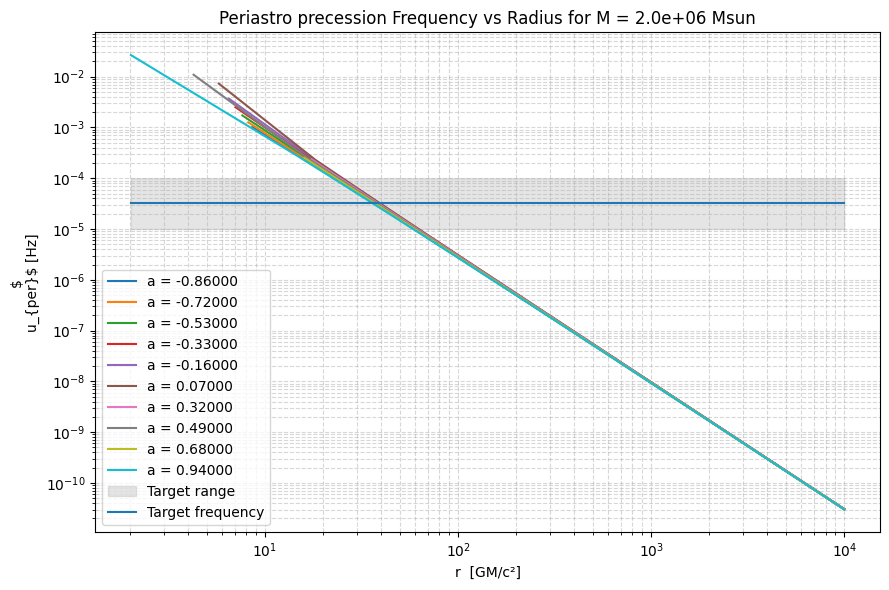

In [84]:
# -----------------------------
# PLOT 1: ν_per(r) FOR DIFFERENT SPINS
# -----------------------------
a_selected = select(a_match, 10)
title = f"Periastro precession Frequency vs Radius for M = {M_bh:.1e} Msun"
label = "$\nu_{per}$ [Hz]"
plot_nu_vs_r(a_selected, M_bh, nu0, target_min, target_max, label, title, nu_per)

##### third, rotation frequency

In [85]:
#let's look for all the matching combinations of parameters
phi_matches = find_match(a_range, r_ranges, nu_phi)
stampa(phi_matches)

Found 279 matches:
a=-0.998, r=212.03109981825742 R_g → ν=3.294561600317587e-05 Hz
a=-0.95, r=212.1300449196624 R_g → ν=3.292308692543498e-05 Hz
a=-0.94, r=211.75858982530616 R_g → ν=3.300983304452285e-05 Hz
a=-0.93, r=211.38622134405972 R_g → ν=3.309717538226673e-05 Hz
a=-0.92, r=211.01293237666215 R_g → ν=3.318512081520714e-05 Hz
a=-0.92, r=212.8799949043049 R_g → ν=3.274963364463677e-05 Hz
a=-0.91, r=210.63871573092948 R_g → ν=3.327367633280275e-05 Hz
a=-0.91, r=212.50332832654598 R_g → ν=3.2836826436964024e-05 Hz
a=-0.9, r=212.12571912903445 R_g → ν=3.2924626382175985e-05 Hz
a=-0.89, r=211.74715986591016 R_g → ν=3.301304058187516e-05 Hz
a=-0.88, r=211.36764299227988 R_g → ν=3.310207625599096e-05 Hz
a=-0.87, r=210.98716086235976 R_g → ν=3.319174074535781e-05 Hz
a=-0.87, r=212.85834567376213 R_g → ν=3.275515581488615e-05 Hz
a=-0.86, r=210.60570572757615 R_g → ν=3.3282041514362095e-05 Hz
a=-0.86, r=212.4743873642087 R_g → ν=3.284406378811884e-05 Hz
a=-0.85, r=212.08944016238036 R_g → 

the radius is alwas around 212 Rg
it's way bigger than the values for the other frequencies, and this is obvious since from the formulas above, this is the biggest frequency once the radius is fixed
they are also all approccimately the same

/tmp/ipykernel_3190/2614636931.py:30: UserWarning: Glyph 11 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/masterpops/IUSS_tesi/PITONE/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


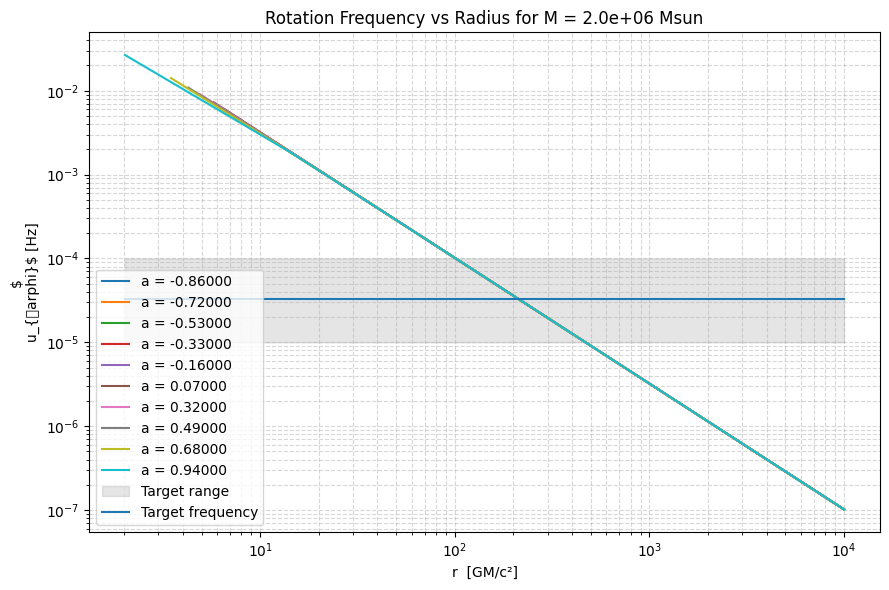

In [86]:
# Plot ν_phi(r) for different spins
a_selected = select(a_match, 10)
title = f"Rotation Frequency vs Radius for M = {M_bh:.1e} Msun"
label = "$\nu_{\varphi}$ [Hz]"
plot_nu_vs_r(a_selected, M_bh, nu0, target_min, target_max, label, title, nu_phi)

#### now let's study varying masses in the range 6-7

In [87]:
def stmp_mass(matches):
    print(f"Found {len(matches)} matches:")
    for m in matches:
        print(f"M=10^{np.log10(m[0])} M_sun, a={m[1]}, r={m[2]} R_g → ν={m[3]} Hz")

def plt_cfr_mass(Ms, a, model, label, title):
    plt.figure(figsize=(9,6))

    for M in Ms:
        r_grid = np.linspace(r_isco(a), 1e4, 800)
        freq = np.array([model(r, a, M) for r in r_grid])
        plt.plot(r_grid, freq, label=f"M = 10^{np.log10(M):.2f} M_sun")
        
    # Target frequency band
    plt.fill_between(r_grid, target_min, target_max, color='gray', alpha=0.2,
                    label="Target range")
    plt.plot(r_grid, np.ones_like(r_grid)*nu0, label="Target frequency")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("r  [GM/c²]")
    plt.ylabel(label)
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

In [88]:
Ms = 10**(np.linspace(6,7, 11))

In [89]:
#let's look for all the matching combinations of parameters
M_LT_matches = find_match(a_range, r_ranges, nu_LT, Ms)

In [90]:
stmp_mass(M_LT_matches)

Found 1419 matches:
M=10^6.0 M_sun, a=-0.998, r=21.827974263901623 R_g → ν=3.267485957582079e-05 Hz
M=10^6.0 M_sun, a=-0.89, r=20.992993266037733 R_g → ν=3.3329353294791336e-05 Hz
M=10^6.0 M_sun, a=-0.88, r=20.93284125613733 R_g → ν=3.329611669207477e-05 Hz
M=10^6.0 M_sun, a=-0.87, r=20.872601222452218 R_g → ν=3.32599033778299e-05 Hz
M=10^6.0 M_sun, a=-0.86, r=20.812272482374972 R_g → ν=3.322063627648987e-05 Hz
M=10^6.0 M_sun, a=-0.85, r=20.75185434418957 R_g → ν=3.3178236250490985e-05 Hz
M=10^6.0 M_sun, a=-0.84, r=20.69134610689912 R_g → ν=3.3132622037786684e-05 Hz
M=10^6.0 M_sun, a=-0.83, r=20.63074706004942 R_g → ν=3.308371018719914e-05 Hz
M=10^6.0 M_sun, a=-0.82, r=20.570056483548154 R_g → ν=3.303141499151228e-05 Hz
M=10^6.0 M_sun, a=-0.81, r=20.50927364747953 R_g → ν=3.297564841822816e-05 Hz
M=10^6.0 M_sun, a=-0.8, r=20.44839781191444 R_g → ν=3.29163200378799e-05 Hz
M=10^6.0 M_sun, a=-0.79, r=20.38742822671574 R_g → ν=3.28533369498207e-05 Hz
M=10^6.0 M_sun, a=-0.78, r=20.326364131

can be explaine by:
* all masses
* all spins
* radius decreaes with mass

> OSS: radius increases with absolute value of spin as before (obv)

###### all masses on a plot

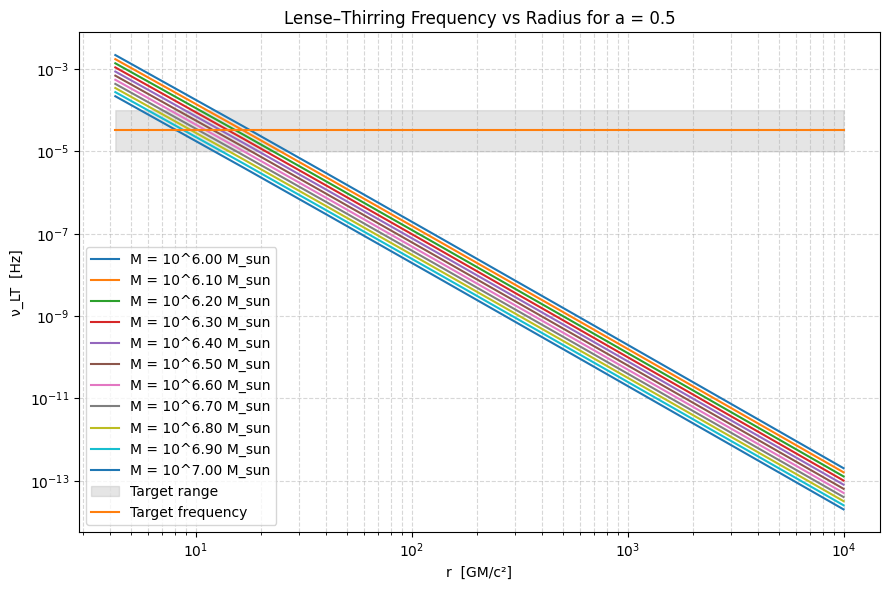

In [91]:
a = 0.5
plt_cfr_mass(Ms, a, nu_LT, "ν_LT  [Hz]", f"Lense–Thirring Frequency vs Radius for a = {a}")

###### okits fir each mass

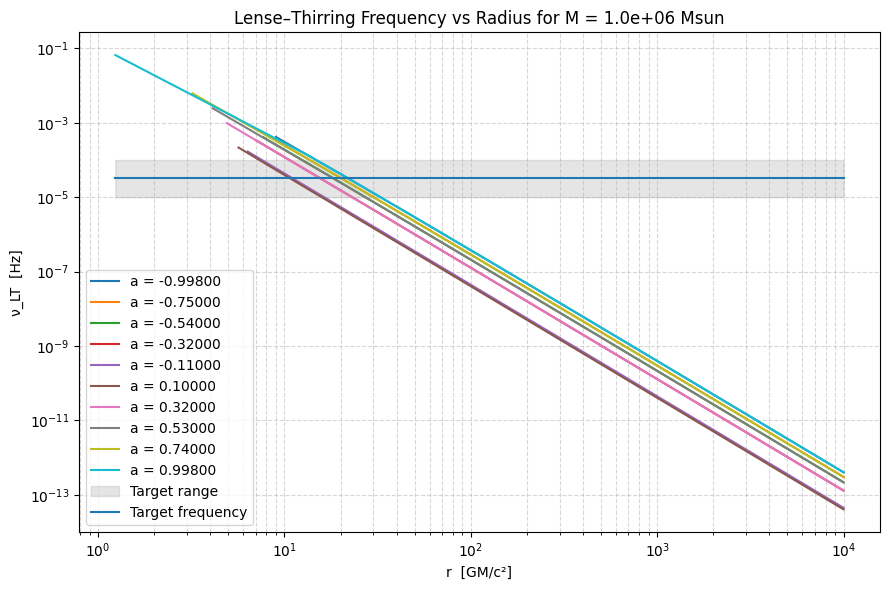

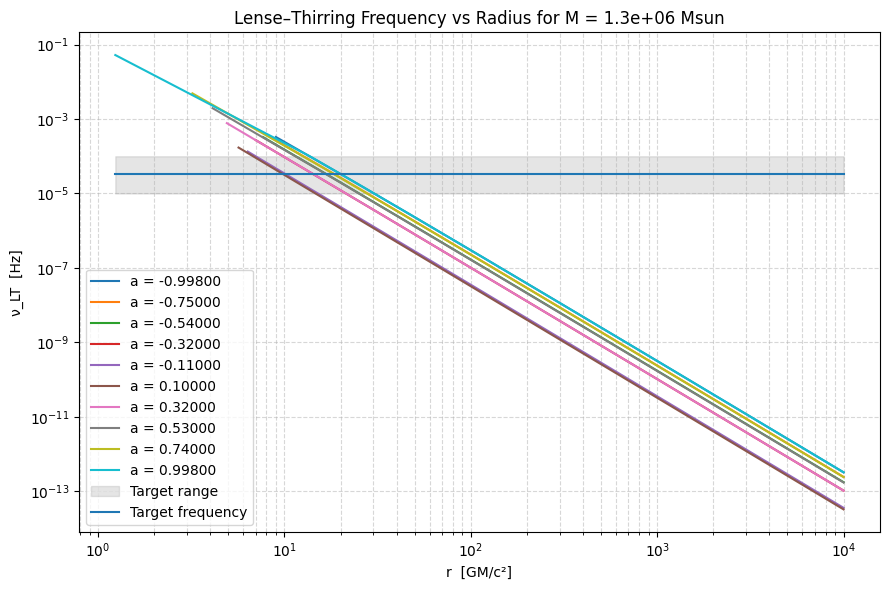

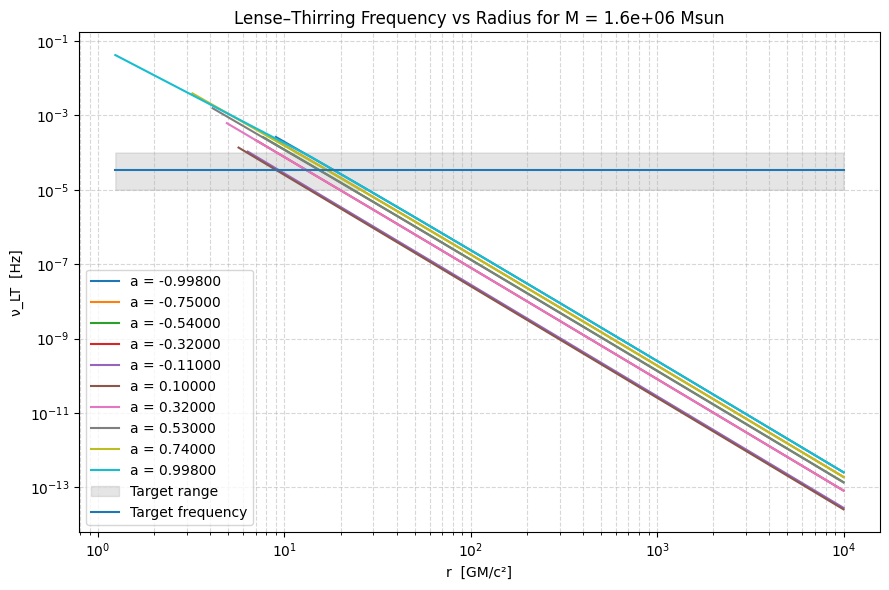

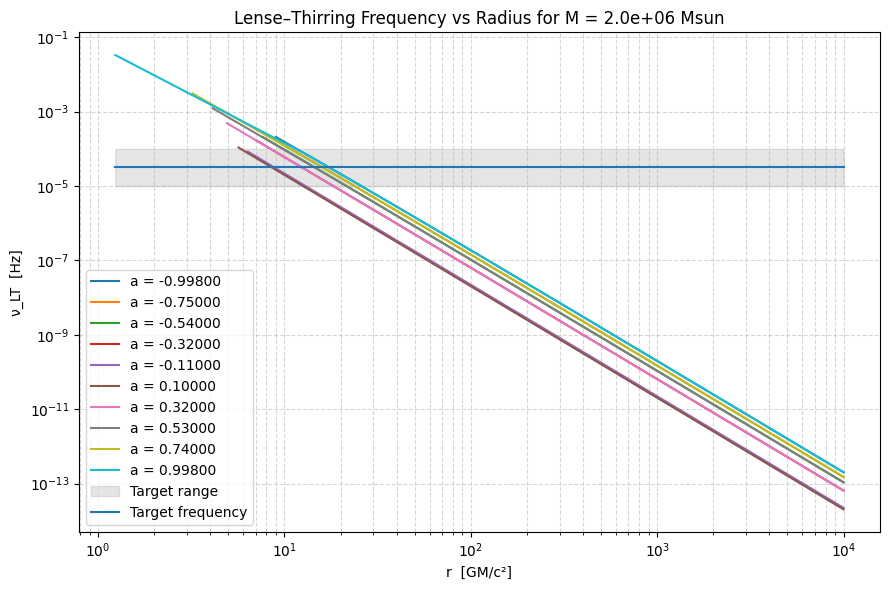

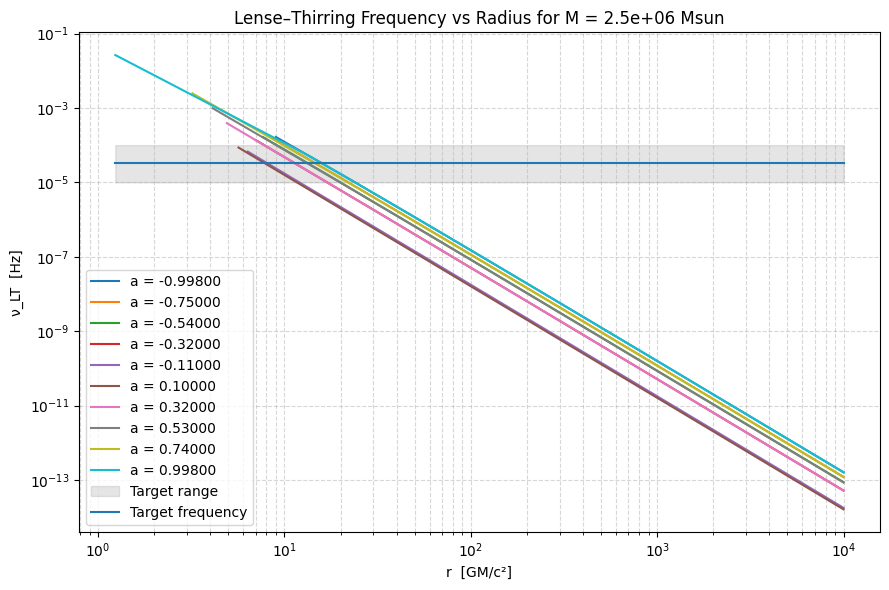

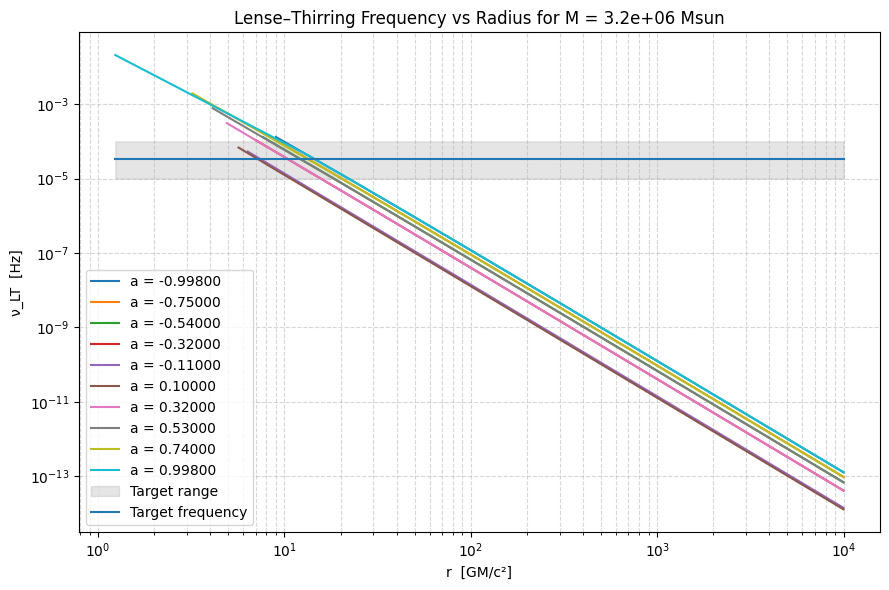

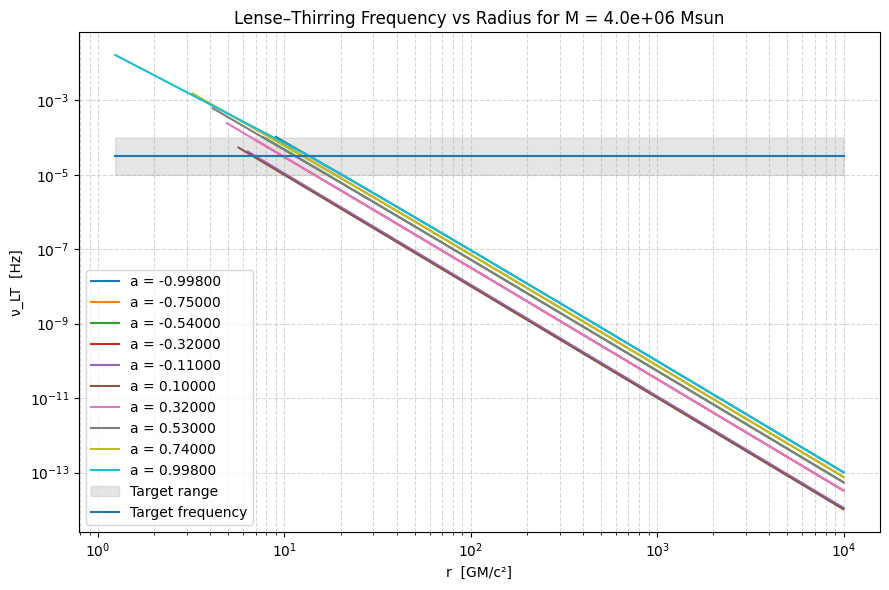

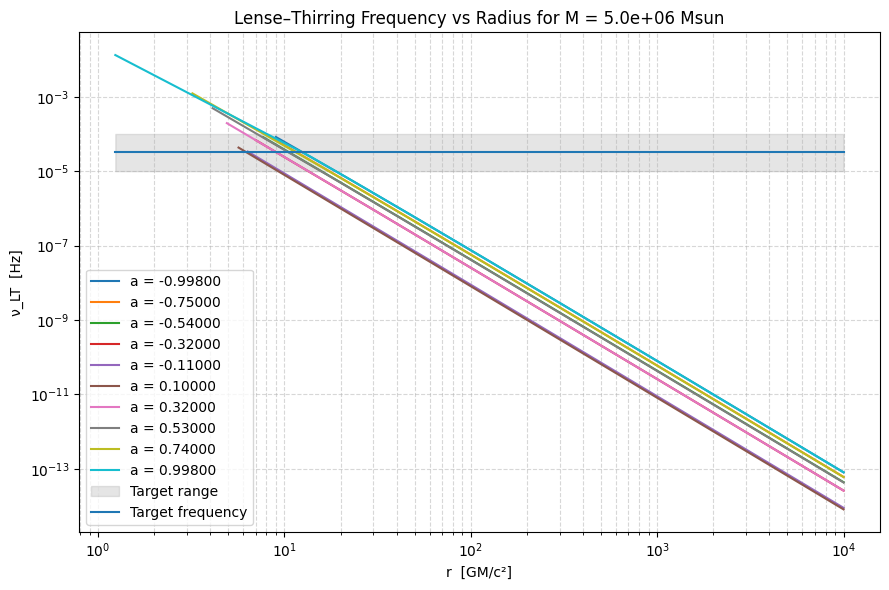

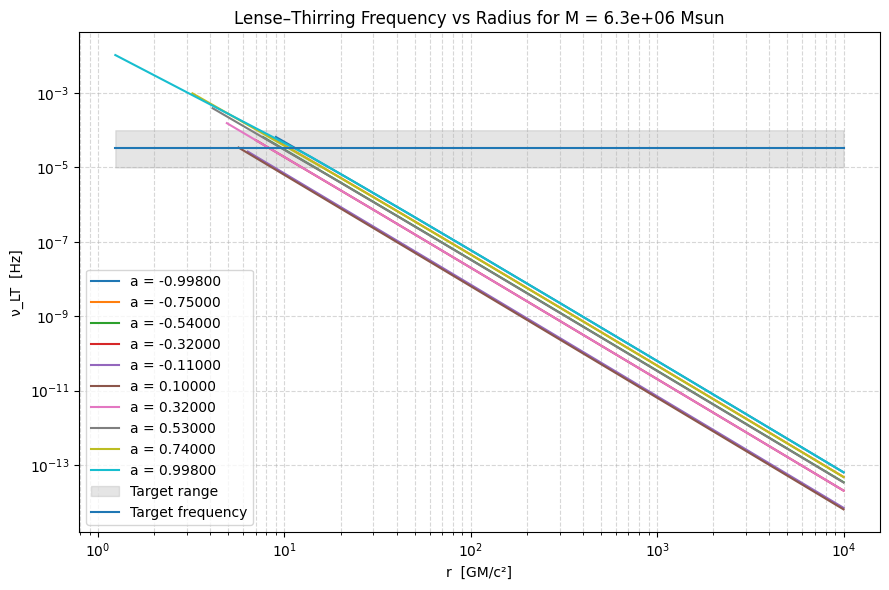

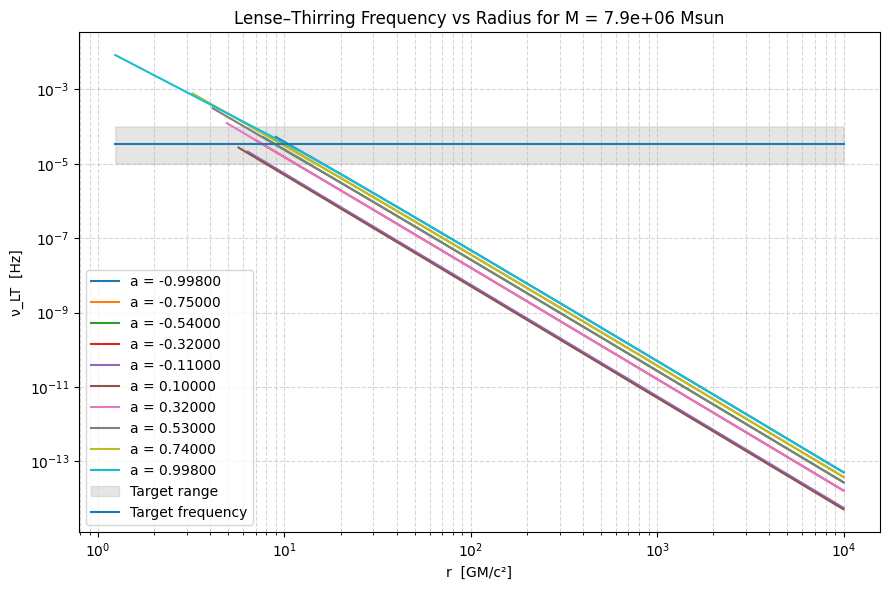

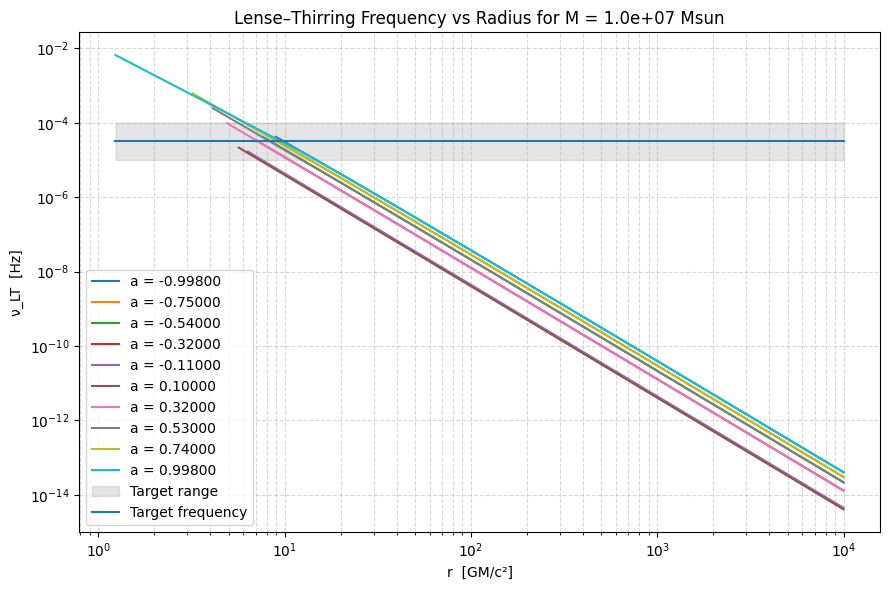

In [92]:
a_selected = select(a_range, 10)
for M in Ms:
    title = f"Lense–Thirring Frequency vs Radius for M = {M:.1e} Msun"
    label = "ν_LT  [Hz]"
    plot_nu_vs_r(a_selected, M, nu0, target_min, target_max, label, title, nu_LT)

## PRECESSING INNER FLOW MODEL

this model assumes a truncated disc and an hot optically thick inner flow misaligned with respect to the spiunning hole and therefore precessing around it.
the precession is assumed to be a solid body one, with a frequency given by the average of the LT freequencies at the different radii covered by the flow.
This freqeuncy therefore depends on the spin nad mass of the compact object, but also on the value of the inner and outer radii of the flow, and on the density distribution, which is generalli assumed to be a power law (with exponent $\zeta$)

$\nu(a, M, r_{in}, r_{out}, \zeta)$

In [103]:
a_range = np.linspace(-95, 95, 39)  # Spins
a_range = a_range/100
a_range = np.insert(a_range, 0, -0.998)  # add extreme retrograde spin
a_range = np.append(a_range, 0.998)      # add extreme prograde spin

r_in_list = []
for a in a_range:
    r0 = r_isco(a)
    rvals = np.exp(np.linspace(np.log(r0), np.log(1e2), 100))  #5e2, 200
    r_in_list.append(rvals)
# stack into (Na, Nr)
r_in_grid = np.array(r_in_list)

# build r_out grid for all spins & all r_in
r_out_list = []
for i, a in enumerate(a_range):
    row = []
    for rin in r_in_grid[i]:
        rvals = np.exp(np.linspace(np.log(rin*1.05), np.log(5e2), 500))
        row.append(rvals)
    r_out_list.append(row)
r_out_grid = np.array(r_out_list)  # shape (Na, Nr_in, Nr_out)

zetas = np.array([-0.45, 0, 0.5])

In [95]:
A     = a_range[:, None, None, None]      # (Na,1,1,1)
RIN   = r_in_grid[:, :, None, None]       # (Na,Nr,1,1)
ROUT  = r_out_grid[:, :, :, None]         # (Na,Nr,No,1)
ZETA  = zetas[None, None, None, :]        # (1,1,1,Nz)

#### fixed mass

In [ ]:
for z in zetas:
    print(f"Computing solid-body precession frequencies for zeta={z}...")
    freq_grid = np.zeros((len(a_range), r_in_grid.shape[1], r_out_grid.shape[2]))
    for i, a in enumerate(a_range):
        for j, rin in enumerate(r_in_grid[i]):
            for k, rout in enumerate(r_out_grid[i][j]):
                freq_grid[i,j,k] = nu_prec_solid_body(a, rin, rout, z, M_bh)
    
    # Now freq_grid has shape (Na, Nr_in, Nr_out)
    # We can find matches
    matches = []
    for i, a in enumerate(a_range):
        for j, rin in enumerate(r_in_grid[i]):
            for k, rout in enumerate(r_out_grid[i][j]):
                freq = freq_grid[i,j,k]
                if abs(freq - nu0) < tol:
                    matches.append((M_bh, a, rin, rout, freq))
    
    print(f"Found {len(matches)} matches for zeta={z}:")
    for m in matches:
        print(f"a={m[1]}, r_in={m[2]}, r_out={m[3]} → ν={m[4]} Hz")

In [104]:
for z in zetas:
    print(f"Computing solid-body precession frequencies for zeta={z}...")
    freq_grid = np.zeros((len(a_range), r_in_grid.shape[1], r_out_grid.shape[2]))
    for i, a in enumerate(a_range):
        for j, rin in enumerate(r_in_grid[i]):
            for k, rout in enumerate(r_out_grid[i][j]):
                freq_grid[i,j,k] = nu_prec_vectorized(a, rin, rout, z)
    
    # Now freq_grid has shape (Na, Nr_in, Nr_out)
    # We can find matches
    matches = []
    for i, a in enumerate(a_range):
        for j, rin in enumerate(r_in_grid[i]):
            for k, rout in enumerate(r_out_grid[i][j]):
                freq = freq_grid[i,j,k]
                if abs(freq - nu0) < tol:
                    matches.append((M_bh, a, rin, rout, freq))
    
    print(f"Found {len(matches)} matches for zeta={z}:")
    for m in matches:
        print(f"a={m[1]}, r_in={m[2]}, r_out={m[3]} → ν={m[4]} Hz")

Computing solid-body precession frequencies for zeta=-0.45...


KeyboardInterrupt: 

In [96]:
freqs = nu_prec_solid_body(A, RIN, ROUT, ZETA)
mask = np.isfinite(freqs) & (np.abs(freqs - nu0) < tol)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
idx = np.where(mask)

print(f"FOUNHD {len(idx[0])} combinations matching target frequency")
for i_a, i_rin, i_rout, i_z in zip(*idx):

    a_val    = a_range[i_a]
    z_val    = zetas[i_z]

    rin_val  = RIN[i_a, i_rin, 0, 0]
    rout_val = ROUT[i_a, i_rin, i_rout, 0]

    f_val    = freqs[i_a, i_rin, i_rout, i_z]

    print(f"a={a_val}, zeta={z_val}, "
          f"r_in={rin_val}, r_out={rout_val}, "
          f"freq={f_val} Hz")

FOUNHD 10941 combinations matching target frequency
a=0.04, zeta=0.5, r_in=5.868725418131567, r_out=6.418752942222656, freq=3.285216763443502e-05 Hz
a=0.04, zeta=0.5, r_in=6.0012873896632035, r_out=6.36566348465729, freq=3.2913278476960975e-05 Hz
a=0.05, zeta=0.5, r_in=5.835703087865181, r_out=7.363765535609398, freq=3.3322000707958666e-05 Hz
a=0.05, zeta=0.5, r_in=5.835703087865181, r_out=7.439337394789436, freq=3.2795734317193356e-05 Hz
a=0.05, zeta=0.5, r_in=5.9676883692047475, r_out=7.372806845678042, freq=3.2929312344662005e-05 Hz
a=0.05, zeta=0.5, r_in=6.102658743210612, r_out=7.308836486905419, freq=3.304167261626417e-05 Hz
a=0.05, zeta=0.5, r_in=6.2406817233065155, r_out=7.24736984419028, freq=3.3132776198921415e-05 Hz
a=0.05, zeta=0.5, r_in=6.381826349857867, r_out=7.188352937302599, freq=3.3202630440749123e-05 Hz
a=0.05, zeta=0.5, r_in=6.381826349857867, r_out=7.260822775553867, freq=3.269662475211526e-05 Hz
a=0.05, zeta=0.5, r_in=6.526163224706375, r_out=7.131734201255154, f

we found solutions for
* spin greater than 0.04
* all z but mainly z=0.5
* for each spin, the frequency is compatible fora very wide range of r_in
* r_out associated to each (a,R_in) varies a lot

###### plot per coppie (a,r_in)

/tmp/ipykernel_658/3729114445.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = f"a={a_val}, r_in={float(rin_val):.4f}"


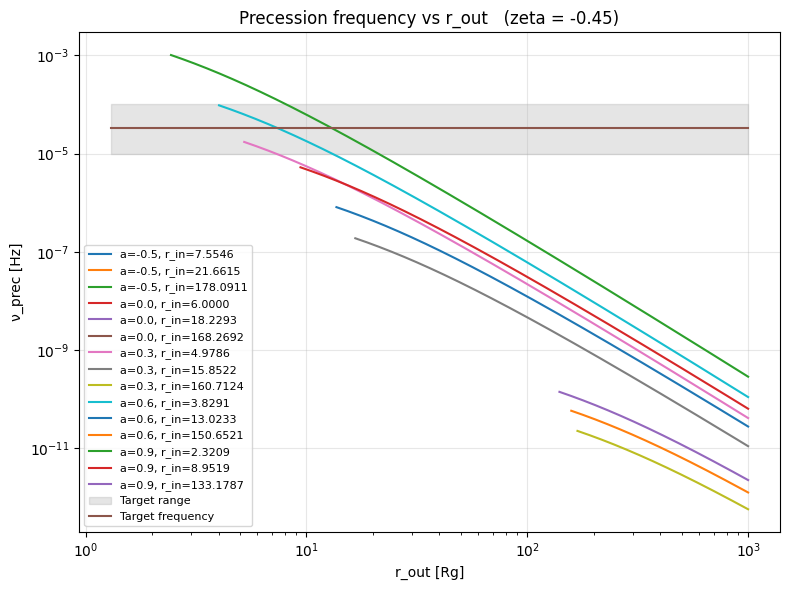

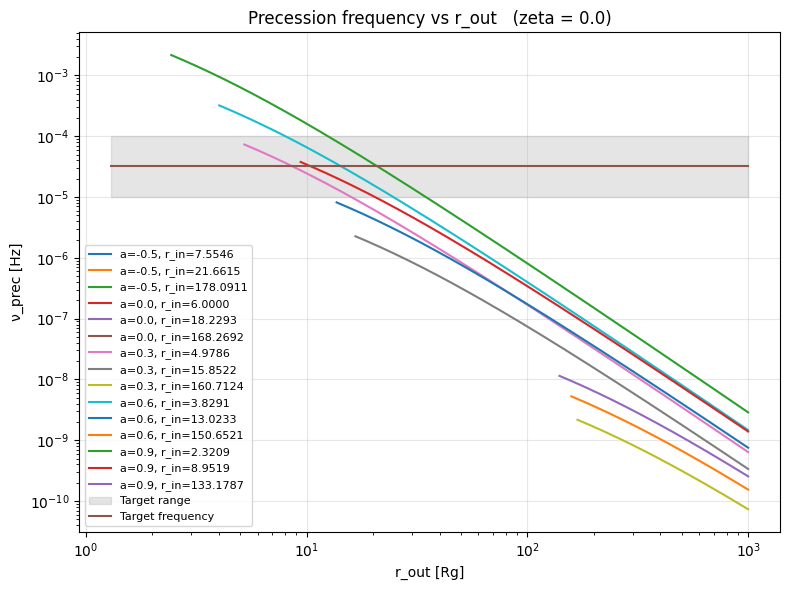

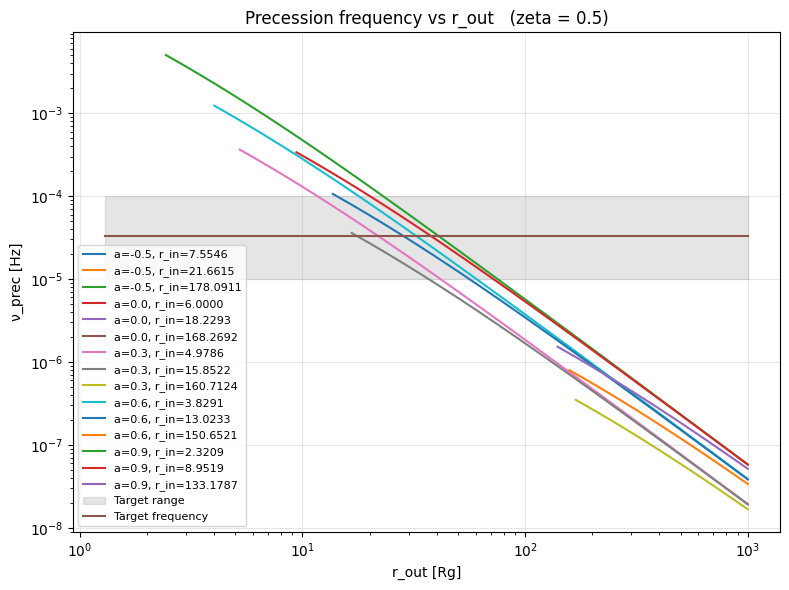

In [ ]:
# Choose indices to plot
a_chosen = np.array([-0.5, 0, 0.3, 0.6, 0.9])         # example
rin_idxs  = [0, 50, 150]                    # example
colors = plt.cm.viridis(np.linspace(0, 1, len(a_chosen)))


# Loop over zeta values
for iz, zeta in enumerate(zetas):
    plt.figure(figsize=(8, 6))
    
    for a_val in a_chosen:
        ia = np.where(a_range == a_val)
        
        for ir in rin_idxs:
            rin_val  = RIN[ia, ir, 0, 0]        # scalar
            rout_vals = ROUT[ia, ir, :, 0]      # vector shape (No,)
            freq_vals = freqs[ia, ir, :, iz]    # vector shape (No,)
            
            # plot only valid positive frequencies
            mask2 = np.isfinite(freq_vals) & (freq_vals > 0)
            
            label = f"a={a_val}, r_in={float(rin_val):.4f}"
            plt.plot(rout_vals[mask2], freq_vals[mask2], label=label)

            
    
    # Target frequency band
    plt.fill_between(r_out_grid[-1, 0], target_min, target_max, color='gray', alpha=0.2,
                    label="Target range")
    plt.plot(r_out_grid[-1, 0], np.ones_like(rout_vals[mask2])*nu0, label="Target frequency")

    plt.title(f"Precession frequency vs r_out   (zeta = {zeta})")
    plt.xlabel("r_out [Rg]")
    plt.ylabel("ν_prec [Hz]")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()


oplotta raggio interno a cui puoi arrivare in funzione dei vari parametri
fallo anche per testr particvle e non c'è più sdip da rout

from the graphs it's clearer that the behavious changes quite for different z, but alwy the negative spins produce way too low frequencies

###### plot r_in fixed, different a

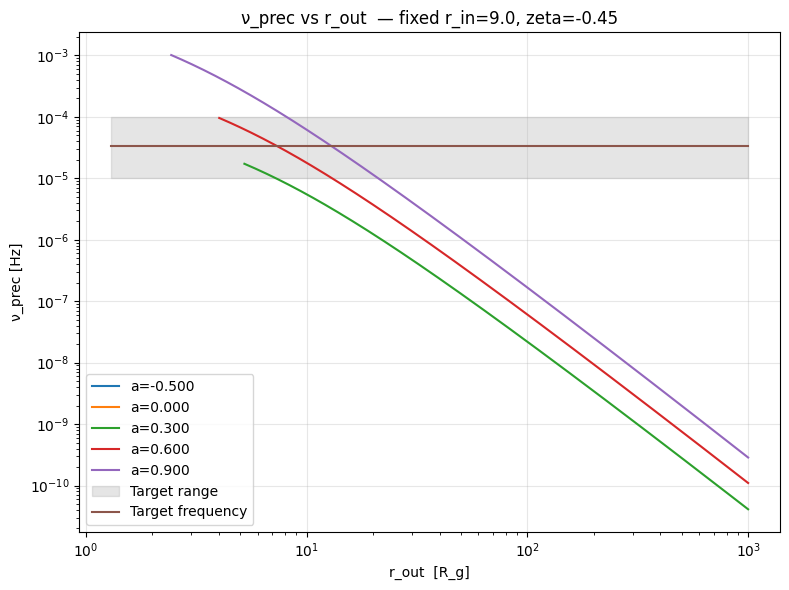

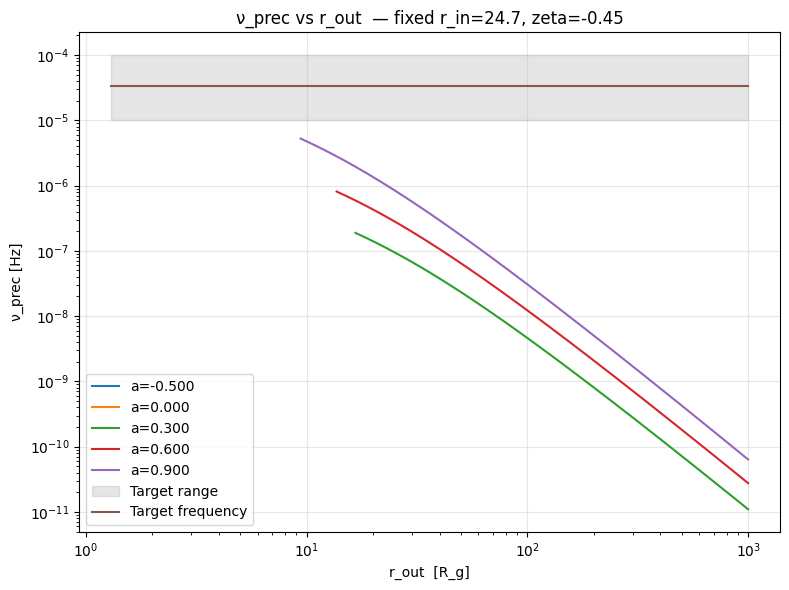

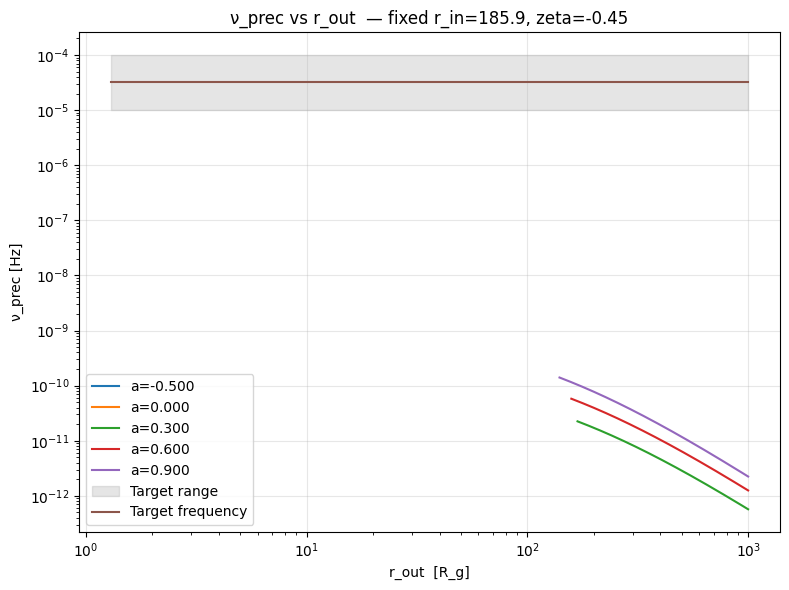

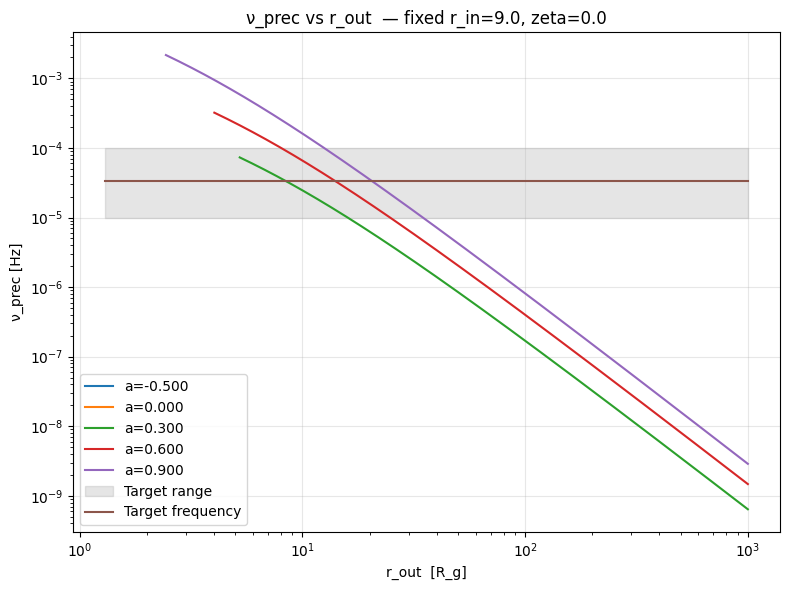

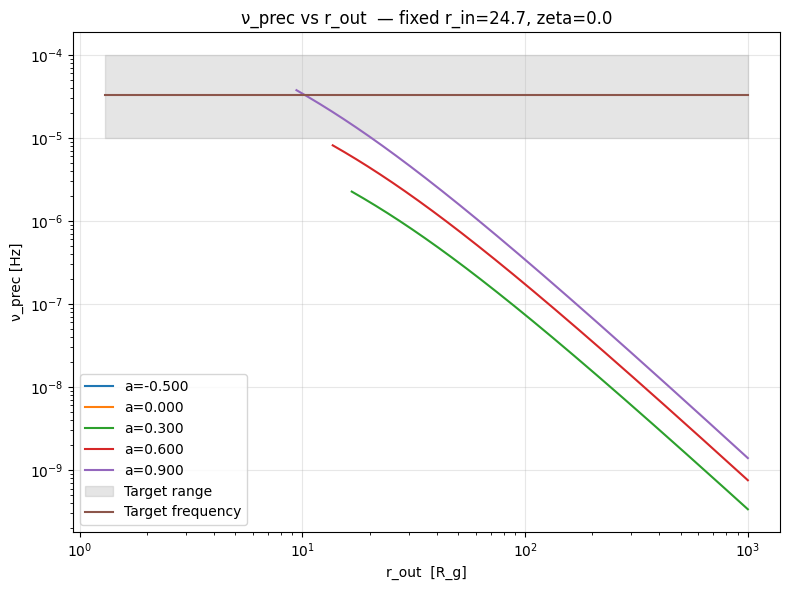

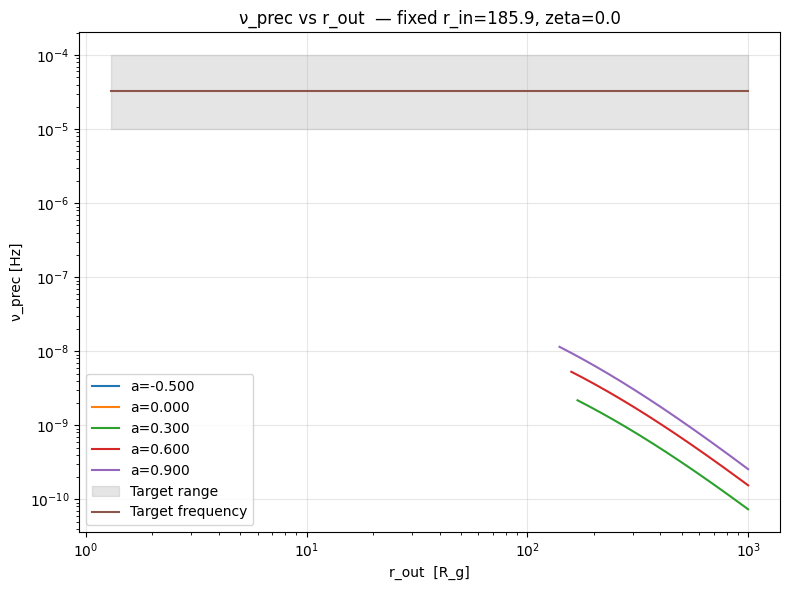

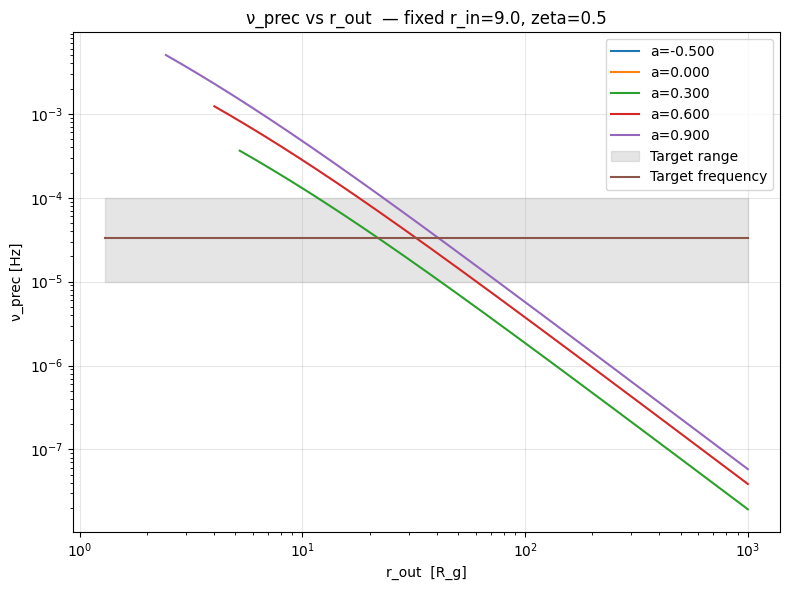

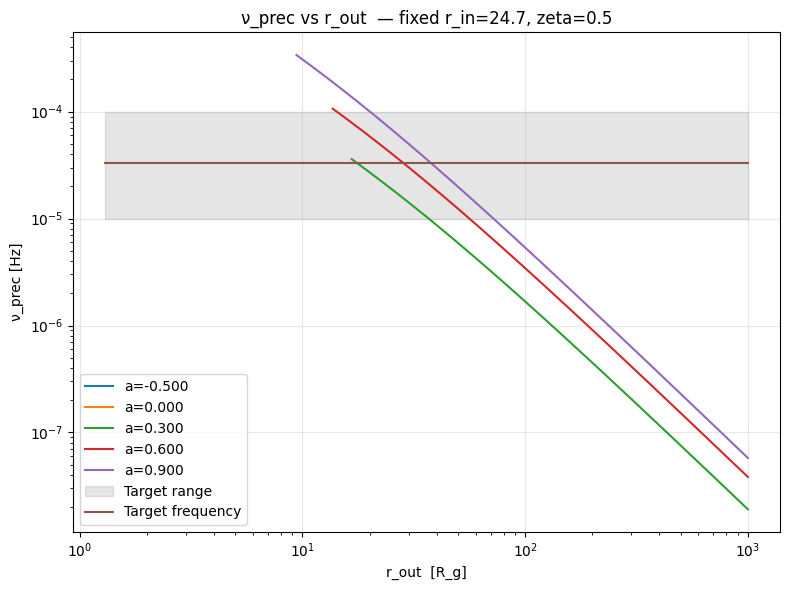

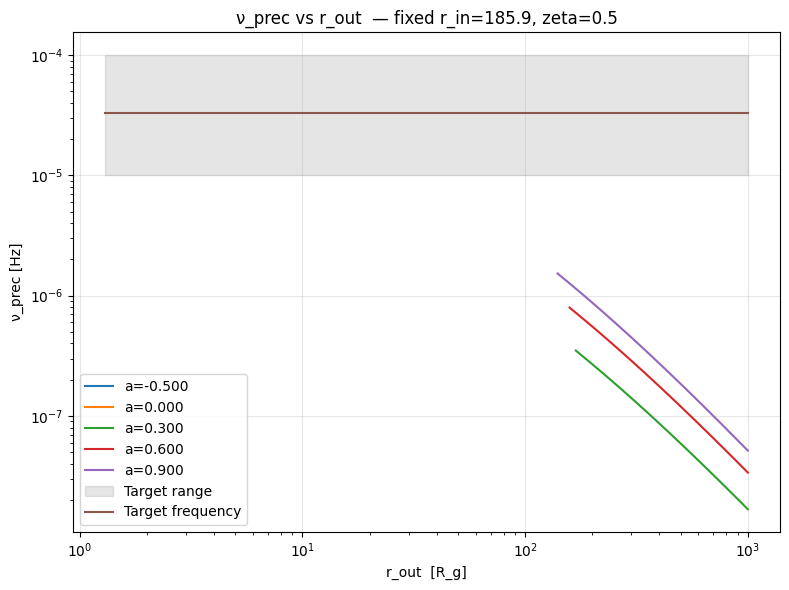

In [ ]:
for iz, zeta in enumerate(zetas):

    for ir in rin_idxs:
        rin_val = RIN[0, ir, 0, 0]  # same for all spins
        
        plt.figure(figsize=(8, 6))

        for a_val in a_chosen:
            ia = np.where(a_range == a_val)
            
            rout_vals = ROUT[ia, ir, :, 0]        # vector
            freq_vals = freqs[ia, ir, :, iz]      # vector

            mask3 = np.isfinite(freq_vals) & (freq_vals > 0)
            
            plt.plot(rout_vals[mask3], freq_vals[mask3],
                     label=f"a={a_val:.3f}")

        # Target frequency band
        plt.fill_between(r_out_grid[-1, 0], target_min, target_max, color='gray', alpha=0.2,
                        label="Target range")
        plt.plot(r_out_grid[-1, 0], np.ones_like(rout_vals[mask3])*nu0, label="Target frequency")


        plt.title(f"ν_prec vs r_out  — fixed r_in={rin_val:.1f}, zeta={zeta}")
        plt.xlabel("r_out  [R_g]")
        plt.ylabel("ν_prec [Hz]")
        plt.xscale("log")
        plt.yscale("log")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

###### plot a fixed, different rins

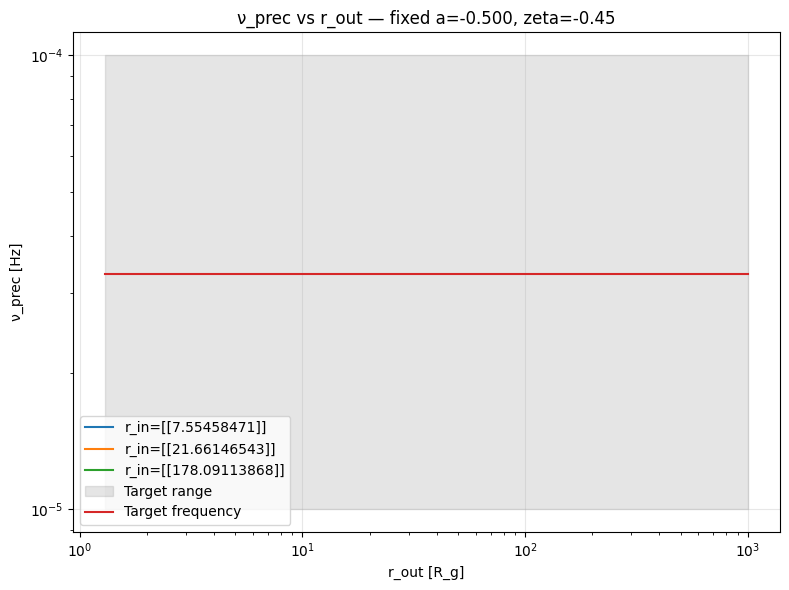

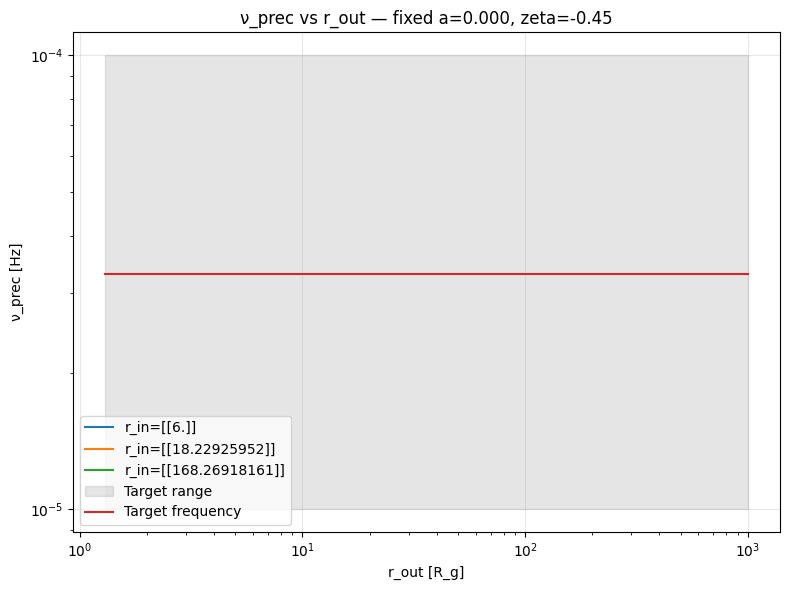

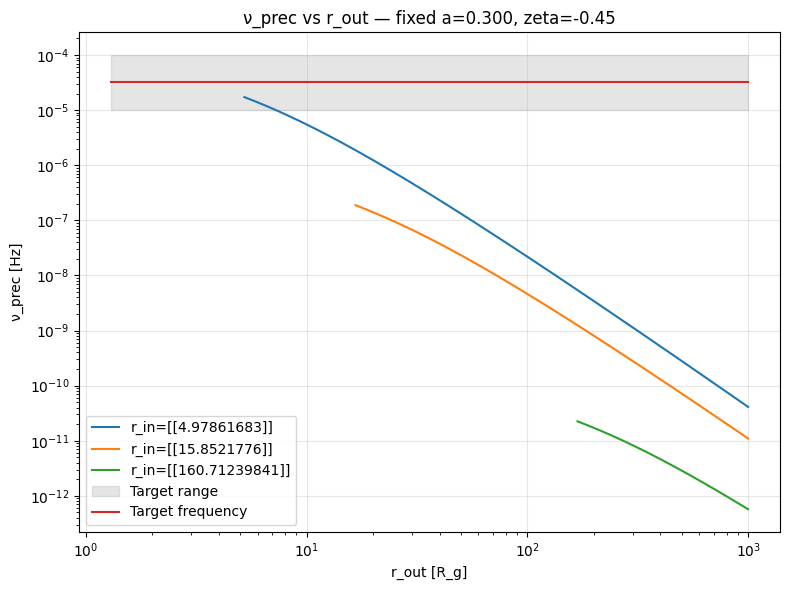

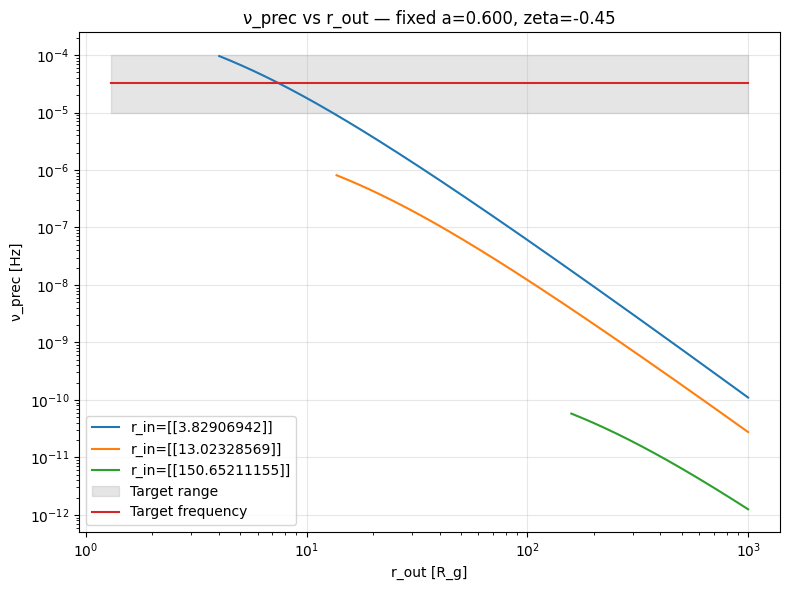

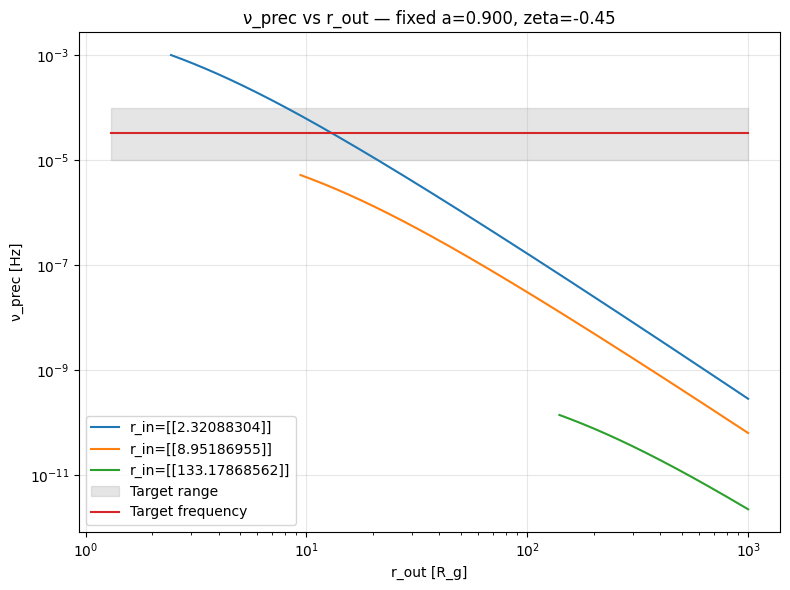

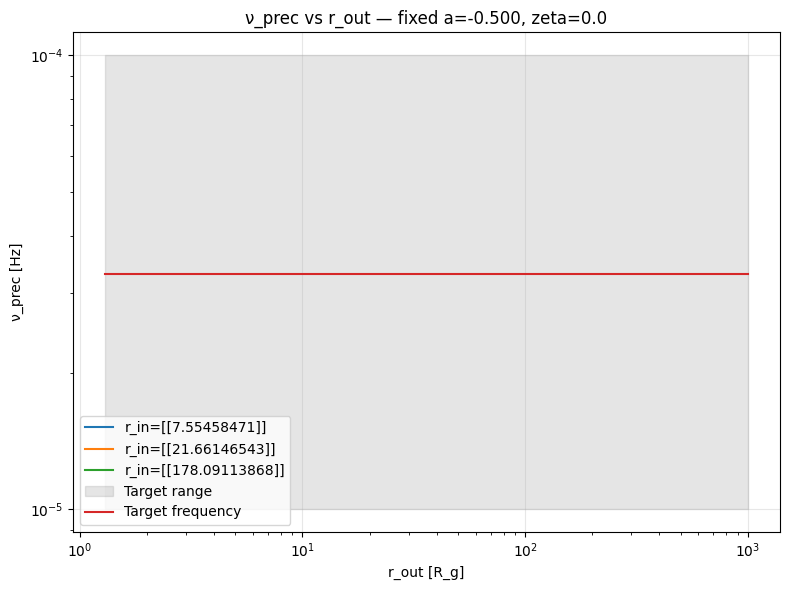

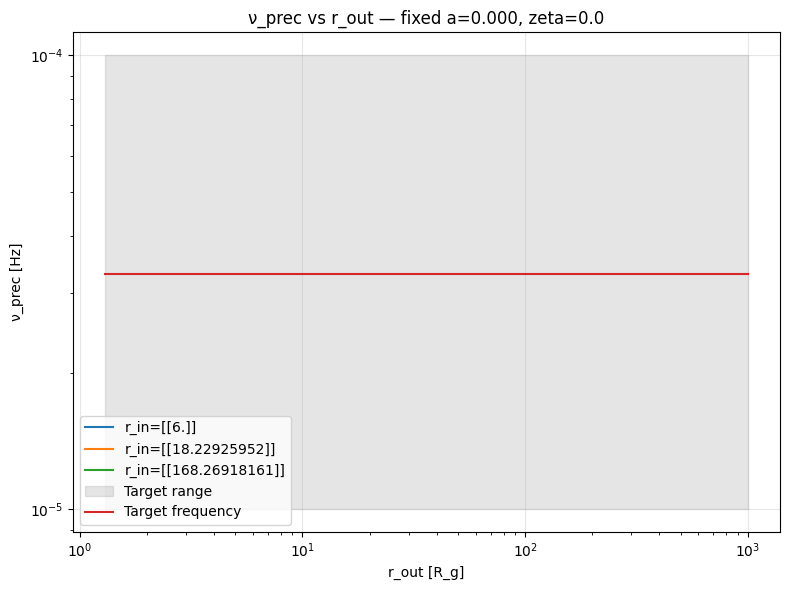

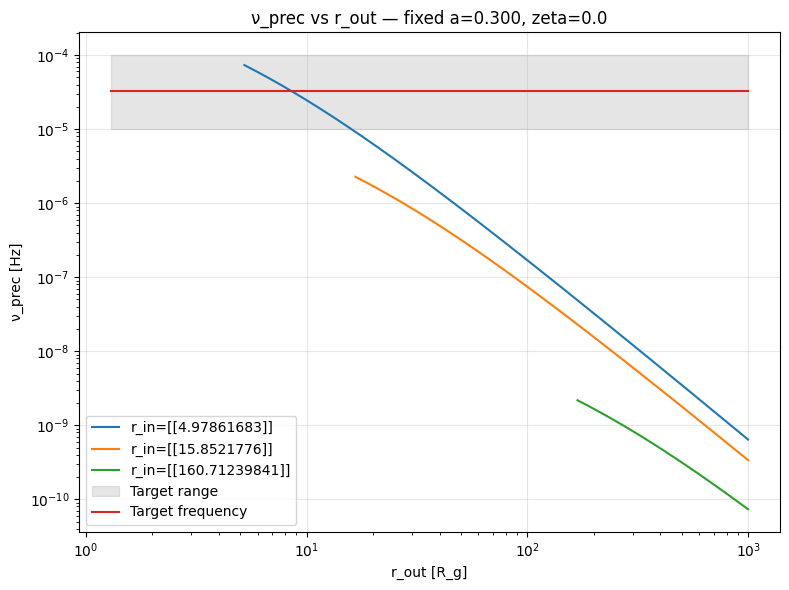

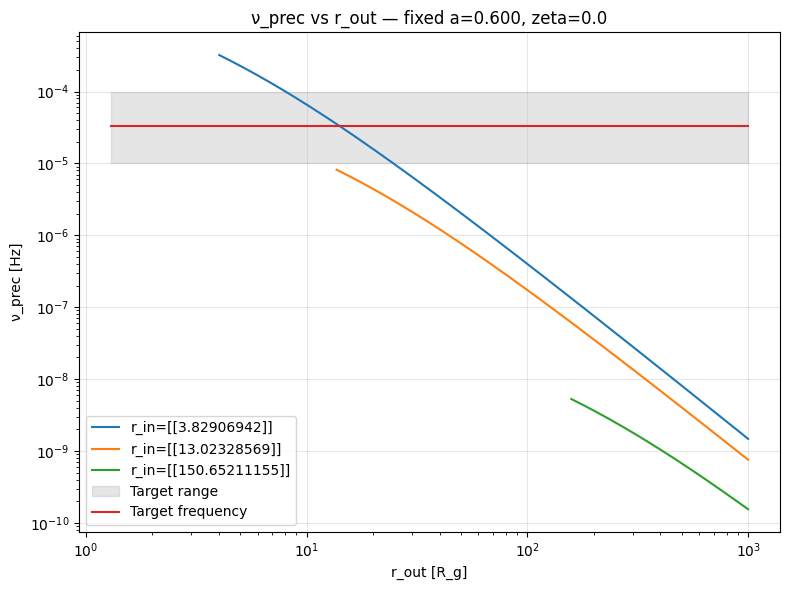

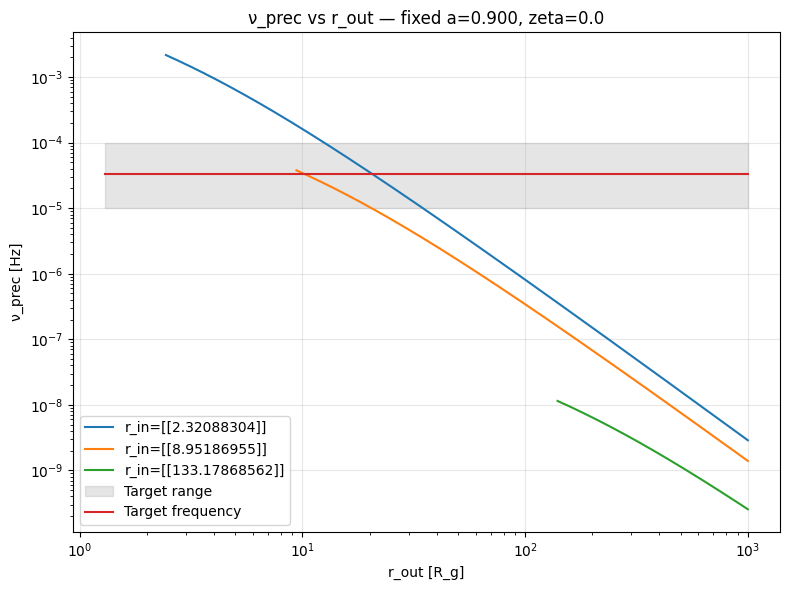

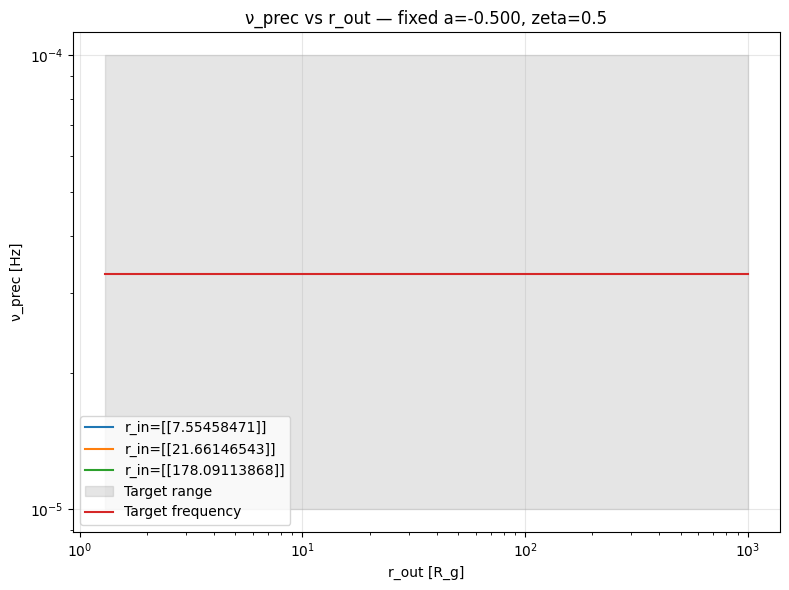

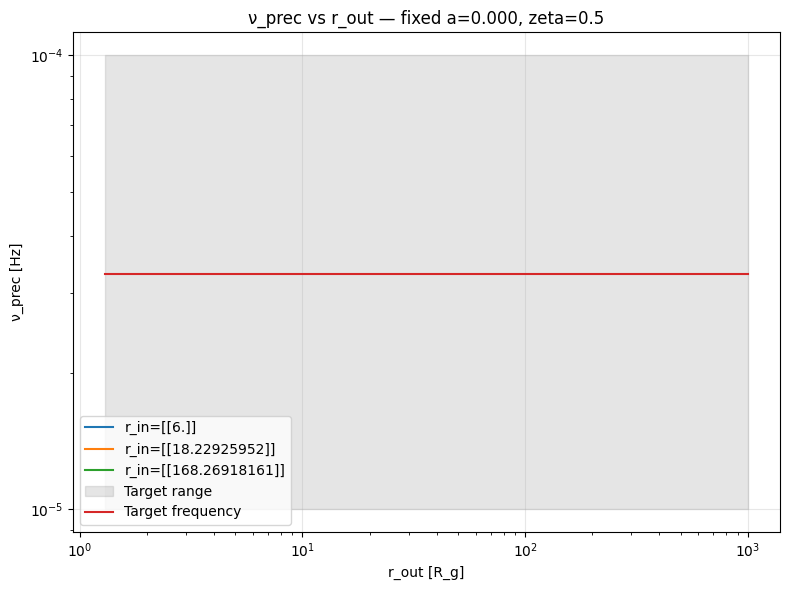

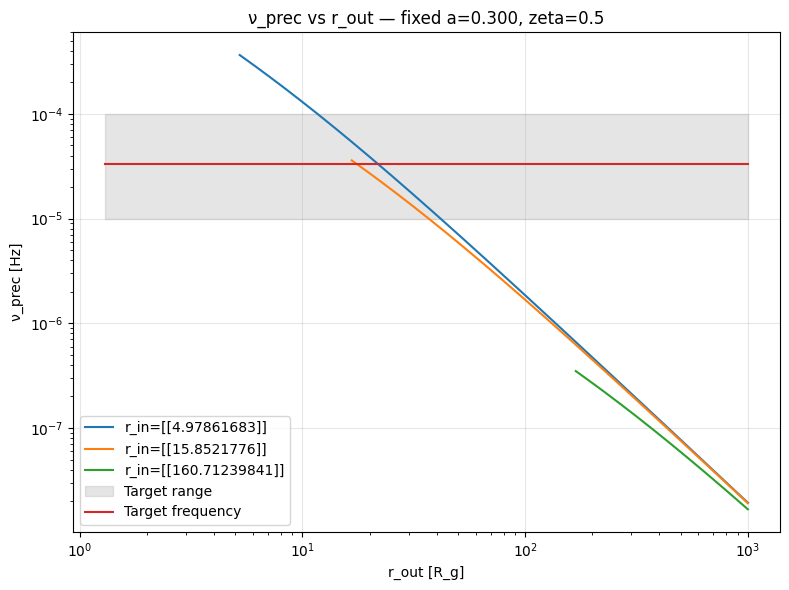

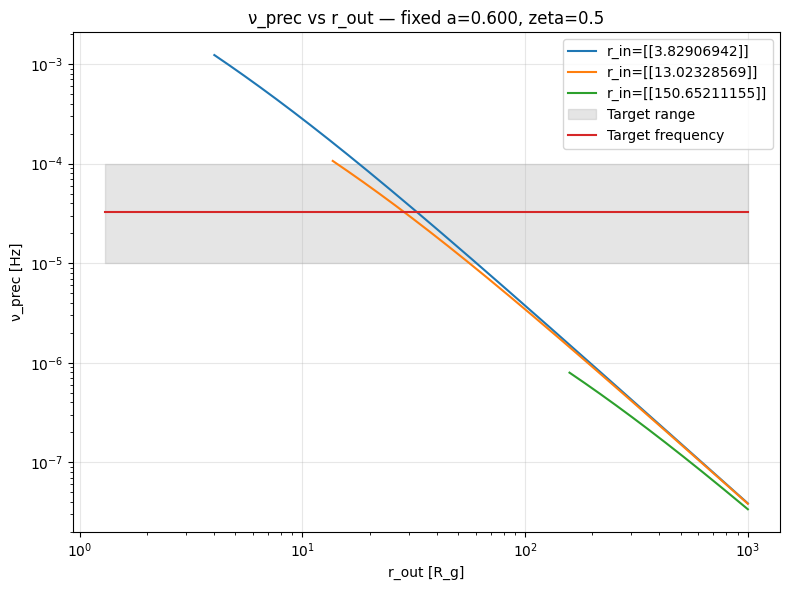

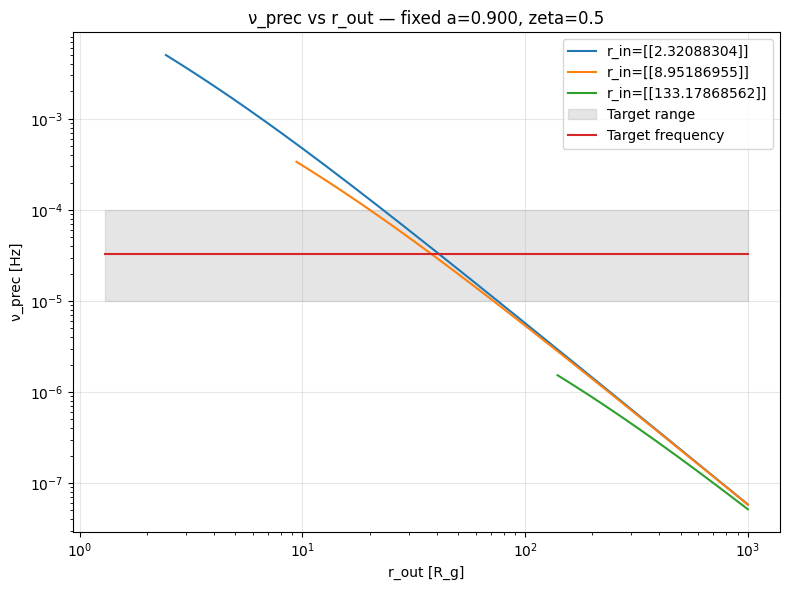

In [ ]:
# plots for fixed z, a, different r_in
for iz, zeta in enumerate(zetas):

    for a_val in a_chosen:
        ia = np.where(a_range == a_val)

        plt.figure(figsize=(8, 6))

        for ir in rin_idxs:
            rin_val  = RIN[ia, ir, 0, 0]
            rout_vals = ROUT[ia, ir, :, 0]
            freq_vals = freqs[ia, ir, :, iz]

            mask4 = np.isfinite(freq_vals) & (freq_vals > 0)

            plt.plot(rout_vals[mask4], freq_vals[mask4],
                     label=f"r_in={rin_val}")

        # Target frequency band
        plt.fill_between(r_out_grid[-1, 0], target_min, target_max, color='gray', alpha=0.2,
                        label="Target range")
        plt.plot(r_out_grid[-1, 0], np.ones_like(r_out_grid[-1, 0])*nu0, label="Target frequency")


        plt.title(f"ν_prec vs r_out — fixed a={a_val:.3f}, zeta={zeta}")
        plt.xlabel("r_out [R_g]")
        plt.ylabel("ν_prec [Hz]")
        plt.xscale("log")
        plt.yscale("log")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

###### 3d plots

/tmp/ipykernel_655/2520292207.py:51: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xscale("log")


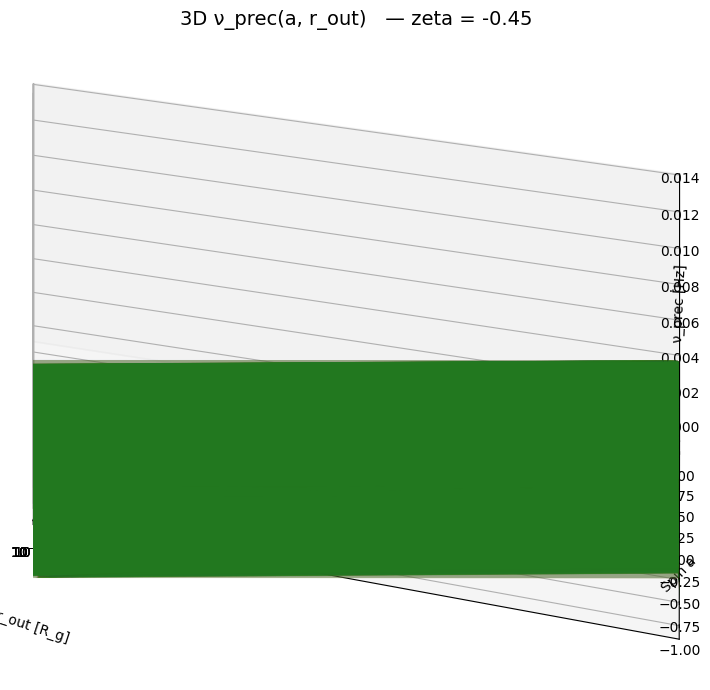

KeyboardInterrupt: 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

rin_indices_to_plot  = [0, 50, 150]                    # example

# Spin indices correspond directly to a_range
Na = len(a_range)
spins = a_range  # vector (Na,)

# ------------------------------
# Main loop: one 3D plot per zeta
# ------------------------------
for iz, zeta in enumerate(zetas):

    fig = plt.figure(figsize=(10, 7))
    ax  = fig.add_subplot(111, projection='3d')

    for ir in rin_indices_to_plot:

        # Extract slices over all spins and all r_out for this (r_in, zeta)
        # Shapes:
        #   ROUT:  (Na, Nr, No, 1)
        #   freqs: (Na, Nr, No, Nz)
        r_out_vals = ROUT[:, ir, :, 0]         # shape (Na, No)
        freq_vals  = freqs[:, ir, :, iz]       # shape (Na, No)

        # Flatten for plotting
        X = r_out_vals.flatten()
        Y = np.repeat(spins, r_out_vals.shape[1])  # spin values
        Z = freq_vals.flatten()

        # Plot surface as scatter (dense surface plots slow)
        ax.plot_trisurf(X, Y, Z, alpha=0.25, linewidth=0.2)

        # ---- Highlight the FOUND POINTS ----
        # mask shape (Na, Nr, No, Nz)
        found_mask = mask[:, ir, :, iz]        # shape (Na, No)

        found_routs = r_out_vals[found_mask]
        found_spins = np.repeat(spins[:, None], r_out_vals.shape[1], axis=1)[found_mask]
        found_freqs = freq_vals[found_mask]

        ax.scatter(
            found_routs, found_spins, found_freqs,
            s=60, color='red', edgecolor='black', label=f"Matches (r_in idx={ir})"
        )

    ax.set_title(f"3D ν_prec(a, r_out)   — zeta = {zeta}", fontsize=14)
    ax.set_xlabel("r_out [R_g]")
    ax.set_ylabel("Spin a")
    ax.set_zlabel("ν_prec [Hz]")
    ax.set_xscale("log")
    ax.set_yscale("linear")

    plt.tight_layout()
    plt.show()


In [ ]:
mask.shape

(1, 1, 500)

#### varying mass

In [ ]:
Ms = 10**(np.linspace(6,7, 3))

masks = []
Ms_freqs = []
for M in Ms:
    M_freqs = nu_prec_solid_body(A, RIN, ROUT, ZETA, M)
    M_mask = np.isfinite(M_freqs) & (np.abs(M_freqs - nu0) < tol)
    Ms_freqs.append(M_freqs)
    masks.append(M_mask)


In [ ]:
for i, msk in enumerate(masks):
    M = Ms[i]
    fre = Ms_freqs[i]
    idx = np.where(msk)

    print(f"FOUNHD {len(idx[0])} combinations matching target frequency for M = 10^{np.log10(M):.2f} M_sun")
    """
    for i_a, i_rin, i_rout, i_z in zip(*idx):

        a_val    = a_range[i_a]
        z_val    = zetas[i_z]

        rin_val  = RIN[i_a, i_rin, 0, 0]
        rout_val = ROUT[i_a, i_rin, i_rout, 0]

        f_val    = fre[i_a, i_rin, i_rout, i_z]

        print(f"a={a_val}, zeta={z_val}, "
            f"r_in={rin_val}, r_out={rout_val}, "
        f"freq={f_val} Hz")
    """

FOUNHD 10565 combinations matching target frequency for M = 10^6.00 M_sun
FOUNHD 6653 combinations matching target frequency for M = 10^6.50 M_sun
FOUNHD 3577 combinations matching target frequency for M = 10^7.00 M_sun


less matches for greateer masses, but still the same variety sas above

##### cfr different masses

In [ ]:
def plt_cfr_mass_2(Ms, a, rin, zeta, label, title):
    plt.figure(figsize=(9,6))

    for M in Ms:
        rout_grid = np.linspace(rin, 1e3, 500)
        for z in zeta:
            fq = np.array([nu_prec_solid_body(a, rin, r, z, M) for r in rout_grid])
            plt.plot(rout_grid, fq, label=f"M = 10^{np.log10(M):.2f} Msun, z={z}")
        
        # Target frequency band
        plt.fill_between(rout_grid, target_min, target_max, color='gray', alpha=0.2,
                        label="Target range")
        plt.plot(rout_grid, np.ones_like(rout_grid)*nu0, label="Target frequency")

        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel("r  [GM/c²]")
        plt.ylabel(label)
        plt.title(title)
        plt.legend()
        plt.grid(True, which="both", ls="--", alpha=0.5)
        plt.tight_layout()
        plt.show()

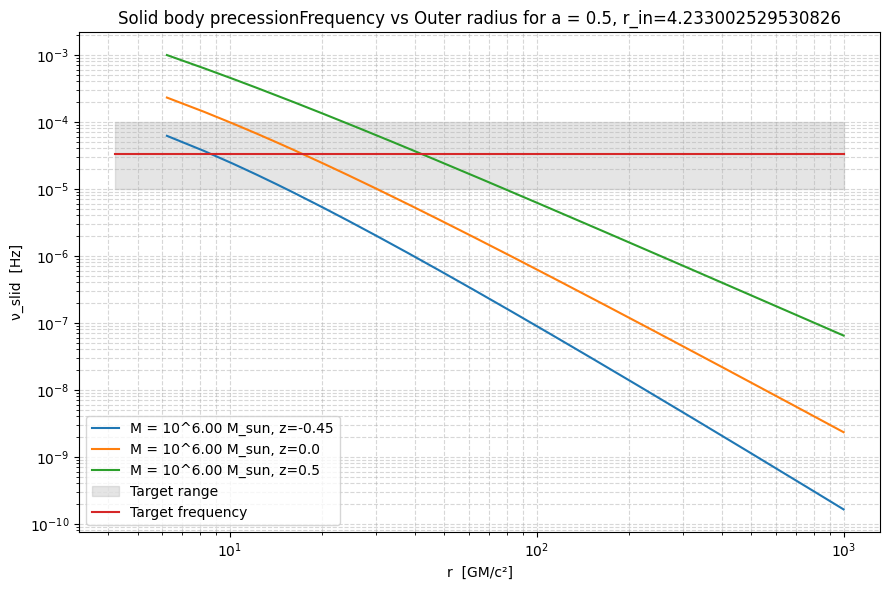

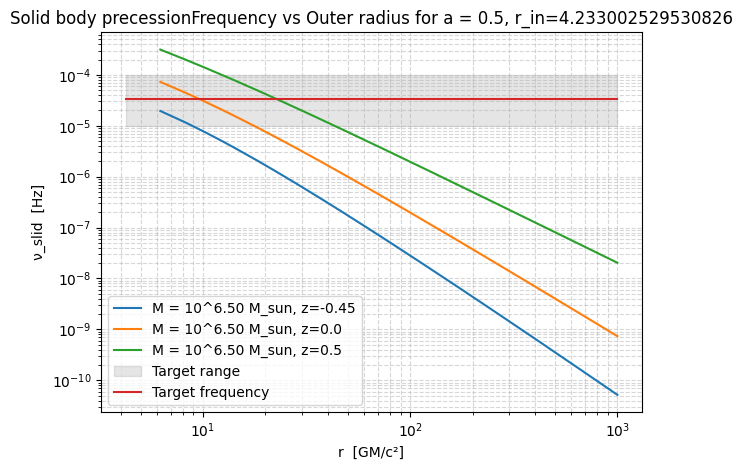

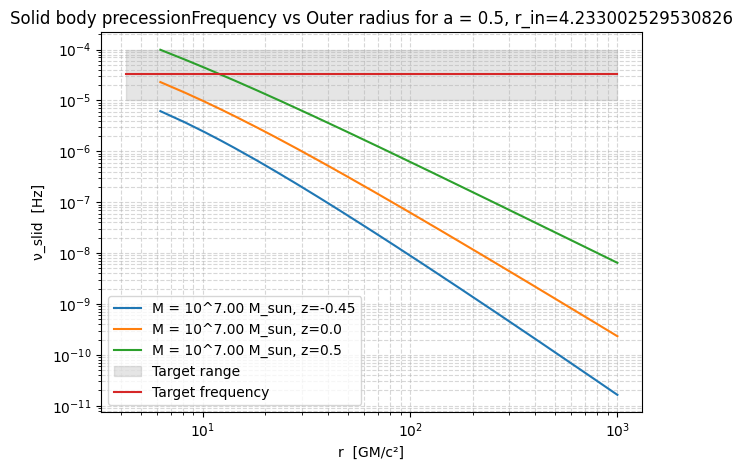

In [ ]:
a = 0.5
rin = r_isco(a) * 1
plt_cfr_mass_2(Ms, a, rin, zetas, "ν_slid  [Hz]", f"Solid body precessionFrequency vs Outer radius for a = {a}, r_in={rin}")

* lowering the spin 
* increasing the mass
* increasing r_in

reduce the frequency, so less matching is found

vediamo la dipendenza da z, strana che vari
masse e raggi più grandi rallentano perché allargano il sistema

###### plots for fixed M, z

/tmp/ipykernel_11675/1267702919.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = f"a={a_val}, r_in={float(rin_val):.4f}"


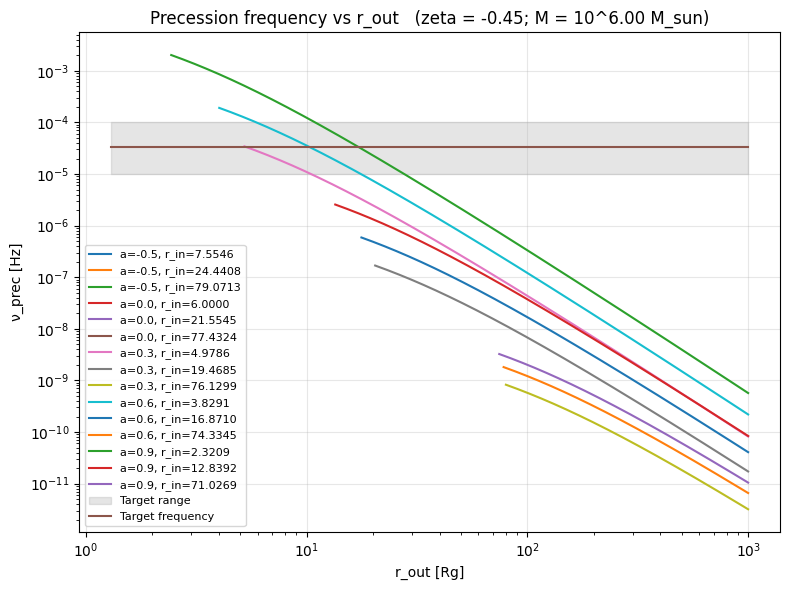

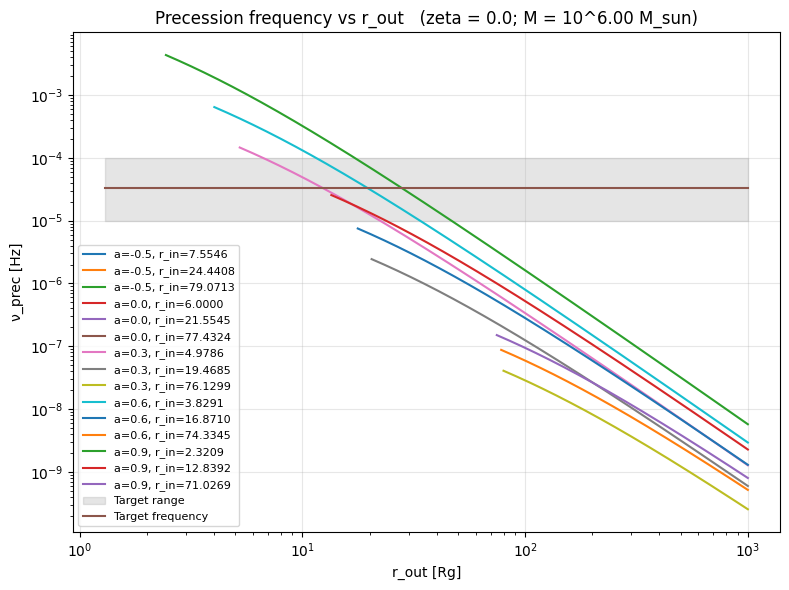

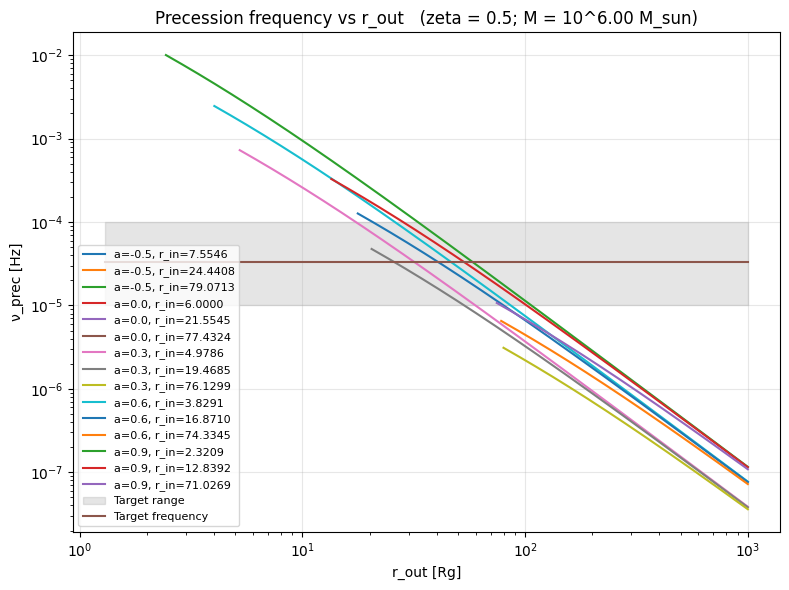

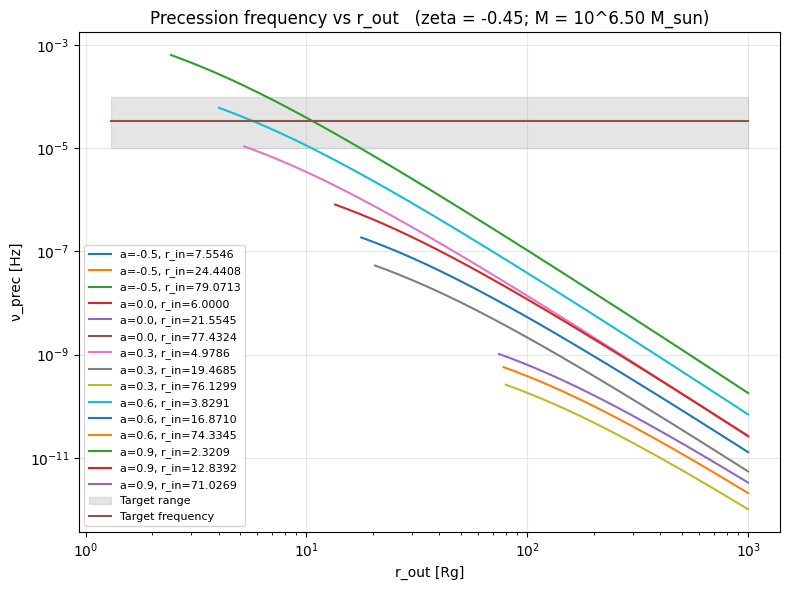

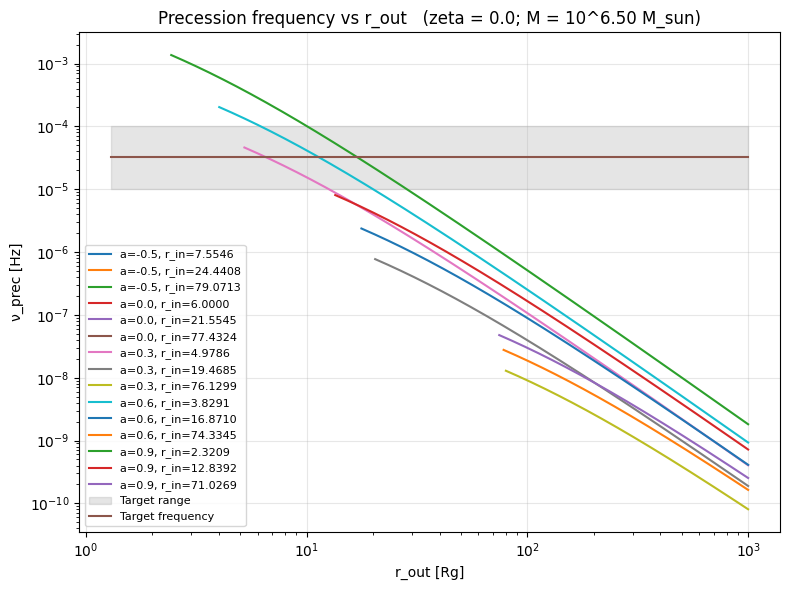

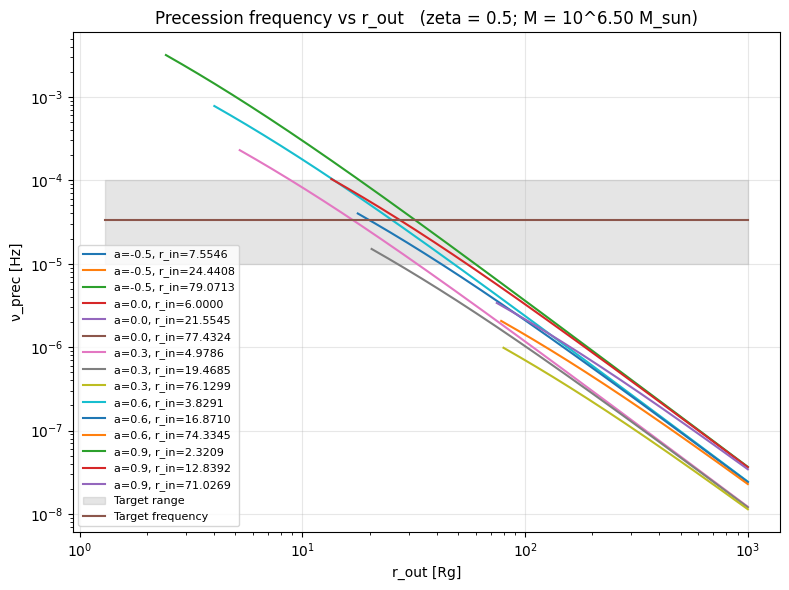

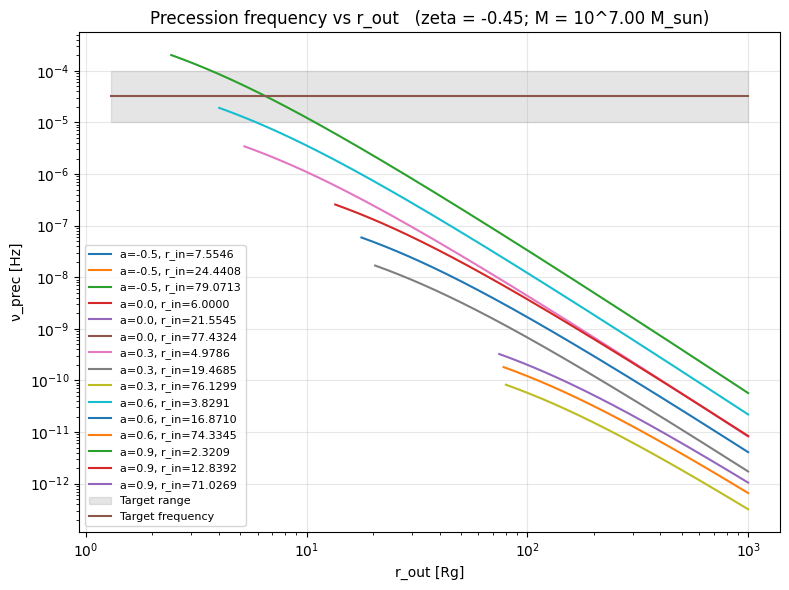

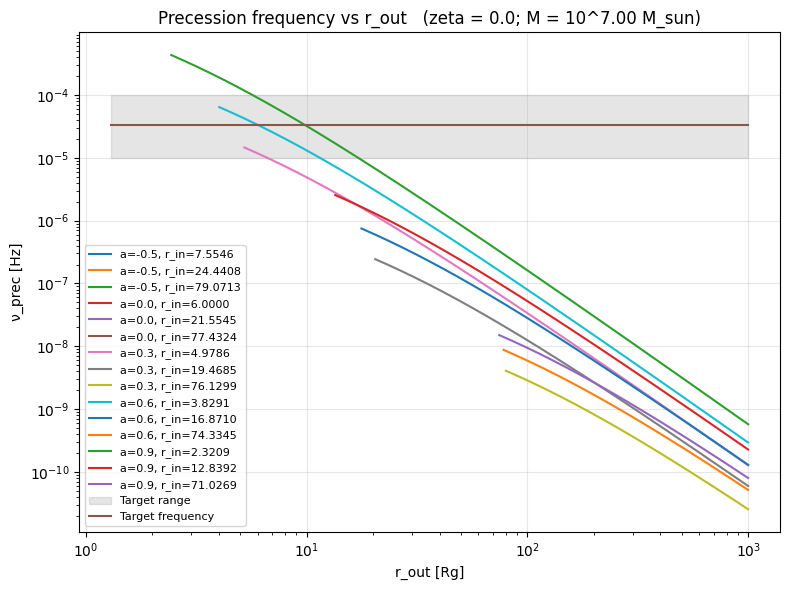

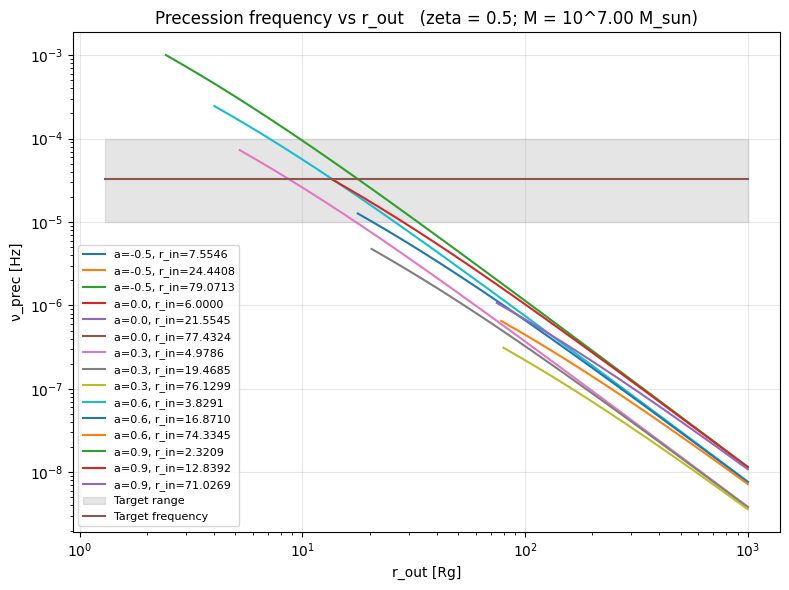

In [ ]:
a_chosen = np.array([-0.5, 0, 0.3, 0.6, 0.9])         # example
rin_idxs  = [0, 45, 90]                    # example
colors = plt.cm.viridis(np.linspace(0, 1, len(a_chosen)))

for i, fre in enumerate(Ms_freqs):
    # Loop over zeta values
    for iz, zeta in enumerate(zetas):
        plt.figure(figsize=(8, 6))
        
        for a_val in a_chosen:
            ia = np.where(a_range == a_val)
            
            for ir in rin_idxs:
                rin_val  = RIN[ia, ir, 0, 0]        # scalar
                rout_vals = ROUT[ia, ir, :, 0]      # vector shape (No,)
                freq_vals = fre[ia, ir, :, iz]    # vector shape (No,)
                
                # plot only valid positive frequencies
                mask2 = np.isfinite(freq_vals) & (freq_vals > 0)
                
                label = f"a={a_val}, r_in={float(rin_val):.4f}"
                plt.plot(rout_vals[mask2], freq_vals[mask2], label=label)

            
        
        # Target frequency band
        plt.fill_between(r_out_grid[-1, 0], target_min, target_max, color='gray', alpha=0.2,
                        label="Target range")
        plt.plot(r_out_grid[-1, 0], np.ones_like(rout_vals[mask2])*nu0, label="Target frequency")

        plt.title(f"Precession frequency vs r_out   (zeta = {zeta}; M = 10^{np.log10(Ms[i]):.2f} M_sun)")
        plt.xlabel("r_out [Rg]")
        plt.ylabel("ν_prec [Hz]")
        plt.xscale("log")
        plt.yscale("log")
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=8)
        plt.tight_layout()
        plt.show()


## confronti e check da fare

oplotta raggio interno a cui puoi arrivare in funzione dei vari parametri
fallo anche per testr particvle e non c'è più sdip da rout

quanto è estesa la corona, lhot flow degli AGN?
se fosse molto estesa, non si può spiegare

modelli di riflessione vogliono disco sottile che arrivi molto vicino al BH, quindi flow deve esserre molto stretto: oltre 10Rg è già troppo forse

OSS: in agn il disco non emette nemmeno in X perché troppo grande

In [ ]:
a = 0.5
rin = r_isco(a)
routs = np.linspace(rin, 1e2, 100)
zetas = [-1, -0.45, 0, 0.5, 1]

nu_solid = [nu_prec_solid_body(a, rin, routs, z, M_bh) for z in zetas]

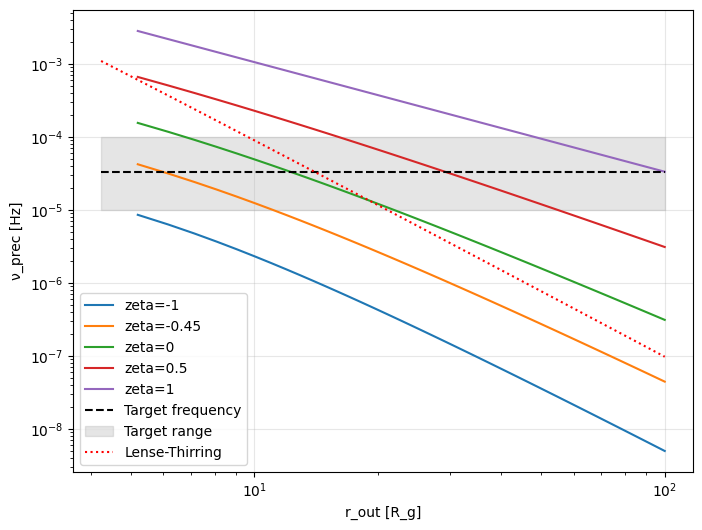

In [ ]:
plt.figure(figsize=(8,6))
for i, z in enumerate(zetas):
    plt.plot(routs, nu_solid[i], label=f"zeta={z}") 

plt.plot(routs, np.ones_like(routs)*nu0, label="Target frequency", color='black', linestyle='--')
plt.fill_between(routs, target_min, target_max, color='gray', alpha=0.2,
                label="Target range")

plt.plot(routs, nu_LT(routs, a), label="Lense-Thirring", color='red', linestyle=':')

plt.xlabel("r_out [R_g]")
plt.ylabel("ν_prec [Hz]")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, alpha=0.3)
plt.legend()

